In [1]:
import pandas as pd
import numpy as np
import os  
print("文件列表：",os.listdir("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/2-testin-rj"))
data = pd.ExcelFile("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/2-testin-rj/Embeded_FS/EmbededFS-results.xlsx")
sheet_names = data.sheet_names
print("列表名：",sheet_names )

文件列表： ['Embeded_FS', 'RFselect01-auc-MI2023.csv', 'split']
列表名： ['STACK', 'NB', 'RF', 'KNN', 'SVM', 'LR', 'RFFI', 'RFFI1']


In [2]:
# data = pd.read_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/test_label.csv")
# y = data.label
# print(y)
# data = data.drop(columns=['id','label'])

# scaler = StandardScaler()#因此选用StandardScaler进行归一化
# scaler.fit(data.values)


# X = pd.DataFrame(data = scaler.transform(data.values), columns=data.columns)
# X['label']=y



# outputpath = "C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/testZscore.csv"
# X.to_csv(outputpath,sep=',',index=False,header=True) 
# # df1是你想要输出的的DataFrame
# # index是否要索引，header是否要列名，True就是需要
# X.head()

In [3]:
# data = pd.read_excel("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group1/RFE.xlsx", sheet_name='g1rfegb12')
name = 'RFFI'
data = pd.read_excel("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/2-testin-rj/Embeded_FS/EmbededFS-results.xlsx", sheet_name=name)

data.keys()
train = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/2-testin-rj/split/Train-FS-ZSCORE-MI.csv")
test = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/2-testin-rj/split/InternalTest-FS-ZSCORE-MI.csv")
test1 = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/2-testin-rj/split/ExternalTest-FS-ZSCORE-MI.csv")
train=train[data.keys()]
train.shape
test=test[data.keys()]
test.shape
test1=test1[data.keys()]
test1.shape

train.to_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/2-testin-rj/split/Train-FS-ZSCORE-MI-RFFI.csv",index=None)
# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/trainZscore-RFERF5.csv",index=None)
# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/trainZscore-RFERF11.csv",index=None)


# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/testZscore-RFERF19.csv",index=None)
# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/testZscore-RFERF5.csv",index=None)
test.to_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/2-testin-rj/split/InternalTest-FS-ZSCORE-MI-RFFI.csv",index=None)


# test1.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/test1Zscore-RFERF19.csv",index=None)
# test1.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/test1Zscore-RFERF5.csv",index=None)
test1.to_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/2-testin-rj/split/ExternalTest-FS-ZSCORE-MI-RFFI.csv",index=None)



In [4]:
train.shape

(70, 23)

In [5]:
test.shape

(18, 23)

In [6]:
#%% load liabrary
import os
import numpy as np
import xlrd
import scipy.io as io
import pandas as pd
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn import svm
from sklearn.model_selection import cross_val_score,ShuffleSplit, train_test_split
from sklearn.linear_model import Lasso, Ridge, LassoCV,LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn import metrics
import itertools
import joblib
from scipy import stats
from sklearn import preprocessing
print("Import library done.\n")

Import library done.



In [7]:
# data = pd.read_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/test_label.csv")
# y = data.label
# print(y)
# data = data.drop(columns=['id','label'])

# scaler = StandardScaler()#因此选用StandardScaler进行归一化
# scaler.fit(data.values)


# X = pd.DataFrame(data = scaler.transform(data.values), columns=data.columns)
# X['label']=y



# outputpath = "C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/testZscore.csv"
# X.to_csv(outputpath,sep=',',index=False,header=True) 
# # df1是你想要输出的的DataFrame
# # index是否要索引，header是否要列名，True就是需要
# X.head()

In [8]:
# DIABETES PREDICTION MODEL

# CLASSIFICATION MODELS - HOLDOUT

'''
Steps to follow:
    - Load the saved dataset
    - General View
    - Modeling
        - Base models: LogisticRegression, GaussianNB, KNeighborsClassifier, SVC, MLPClassifier, DecisionTreeClassifier,
                       BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,
                       XGBClassifier, LGBMClassifier, CatBoostClassifier, NGBClassifier
    - Model Evaluation
    - Model Tuning
    - Model Results
'''

# Import dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)


# Load the preprocessed dataset
# diabetes_preprocessed = pd.read_csv('./diabetes_prepared.csv')

# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/trainZscore-RFERF17-1.csv",index=None)
# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/trainZscore-RFEGB8.csv",index=None)
# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/trainZscore-RFERF17-42.csv",index=None)

# diabetes_preprocessed = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group1/new-auc/train_rferf17.csv")
# diabetes_preprocessed = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group1/new-auc/train_rfegb5.csv")
pathdata="C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/2-testin-rj/split/Train-FS-ZSCORE-MI-RFFI.csv"
diabetes_preprocessed = pd.read_csv(pathdata)




# diabetes_preprocessed = pd.read_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/Results_HRFS01/catboost/train.csv")
df = diabetes_preprocessed.copy()
# df = df.drop(columns="id",axis=1)

## GENERAL VIEW

df.head()
df.shape
df.info()
df.columns
df.index
df.describe([0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 23 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   CT_original_glcm_Contrast                              70 non-null     float64
 1   CT_wavelet-LHH_glcm_ClusterShade                       70 non-null     float64
 2   CT_wavelet2-LHL_glcm_ClusterShade                      70 non-null     float64
 3   CT_wavelet-HHL_firstorder_Median                       70 non-null     float64
 4   CT_wavelet-HHL_firstorder_Mean                         70 non-null     float64
 5   CT_original_firstorder_10Percentile                    70 non-null     float64
 6   CT_wavelet2-LHH_firstorder_Mean                        70 non-null     float64
 7   CT_wavelet-LLH_firstorder_Skewness                     70 non-null     float64
 8   CT_wavelet2-HHL_firstorder_Mean                     

count   mean   std    min  \
CT_original_glcm_Contrast                          70.000 -0.000 1.007 -0.608   
CT_wavelet-LHH_glcm_ClusterShade                   70.000 -0.000 1.007 -5.969   
CT_wavelet2-LHL_glcm_ClusterShade                  70.000 -0.000 1.007 -4.172   
CT_wavelet-HHL_firstorder_Median                   70.000  0.000 1.007 -2.557   
CT_wavelet-HHL_firstorder_Mean                     70.000  0.000 1.007 -2.160   
CT_original_firstorder_10Percentile                70.000  0.000 1.007 -2.248   
CT_wavelet2-LHH_firstorder_Mean                    70.000  0.000 1.007 -3.034   
CT_wavelet-LLH_firstorder_Skewness                 70.000  0.000 1.007 -4.475   
CT_wavelet2-HHL_firstorder_Mean                    70.000  0.000 1.007 -6.996   
CT_wavelet-HLH_glszm_SizeZoneNonUniformityNorma... 70.000  0.000 1.007 -2.138   
PET_original_shape_Elongation                      70.000  0.000 1.007 -3.160   
CT_wavelet2-LHH_firstorder_Skewness                70.000  0.000 1.007 -2.771   
CT_original_firstorder_Entropy                     70.000 -0.000 1.007 -2.868   
CT_wavelet2-LLL_firstorder_10Percentile            70.000  0.000 1.007 -0.944   
CT_wavelet2-LHL_firstorder_Skewness                70.000 -0.000 1.007 -2.630   
CT_wavelet-LHL_firstorder_Mean                     70.000 -0.000 1.007 -5.668   
CT_wavelet-HHL_glcm_ClusterShade                   70.000 -0.000 1.007 -6.288   
CT_wavelet2-HHH_glszm_SizeZoneNonUniformityNorm... 70.000  0.000 1.007 -2.019   
PET_original_firstorder_90Percentile               70.000  0.000 1.007 -1.227   
CT_wavelet2-HLH_glcm_ClusterShade                  70.000 -0.000 1.007 -2.768   
CT_wavelet2-HHH_firstorder_Median                  70.000 -0.000 1.007 -5.430   
CT_lbp-3D-m2_firstorder_90Percentile               70.000 -0.000 1.007 -2.338   
label                                              70.000  0.500 0.504  0.000   

                                                      10%    25%    50%   75%  \
CT_original_glcm_Contrast                          -0.512 -0.380 -0.159 0.015   
CT_wavelet-LHH_glcm_ClusterShade                   -0.801 -0.037  0.150 0.276   
CT_wavelet2-LHL_glcm_ClusterShade                  -0.495 -0.143  0.082 0.203   
CT_wavelet-HHL_firstorder_Median                   -0.931 -0.404 -0.129 0.182   
CT_wavelet-HHL_firstorder_Mean                     -0.960 -0.470 -0.107 0.075   
CT_original_firstorder_10Percentile                -1.265 -0.849  0.128 0.684   
CT_wavelet2-LHH_firstorder_Mean                    -0.998 -0.407 -0.087 0.210   
CT_wavelet-LLH_firstorder_Skewness                 -0.830 -0.511 -0.118 0.411   
CT_wavelet2-HHL_firstorder_Mean                    -0.395 -0.190  0.054 0.269   
CT_wavelet-HLH_glszm_SizeZoneNonUniformityNorma... -1.402 -0.460  0.065 0.538   
PET_original_shape_Elongation                      -1.331 -0.395  0.145 0.651   
CT_wavelet2-LHH_firstorder_Skewness                -1.012 -0.433 -0.129 0.446   
CT_original_firstorder_Entropy                     -1.339 -0.802  0.193 0.751   
CT_wavelet2-LLL_firstorder_10Percentile            -0.665 -0.570 -0.289 0.045   
CT_wavelet2-LHL_firstorder_Skewness                -1.014 -0.323  0.035 0.300   
CT_wavelet-LHL_firstorder_Mean                     -0.748 -0.106  0.200 0.366   
CT_wavelet-HHL_glcm_ClusterShade                   -0.434 -0.192 -0.009 0.183   
CT_wavelet2-HHH_glszm_SizeZoneNonUniformityNorm... -1.277 -0.856 -0.043 0.689   
PET_original_firstorder_90Percentile               -0.966 -0.747 -0.351 0.774   
CT_wavelet2-HLH_glcm_ClusterShade                  -0.536 -0.273 -0.098 0.053   
CT_wavelet2-HHH_firstorder_Median                  -0.578 -0.226  0.062 0.259   
CT_lbp-3D-m2_firstorder_90Percentile               -1.329 -0.551  0.050 0.747   
label                                               0.000  0.000  0.500 1.000   

                                                     90%   95%   99%   max  
CT_original_glcm_Contrast                          0.347 0.574 3.563 7.692  
CT_wavel

In [9]:
# Check for missing values
df.isnull().values.any()
df.isnull().sum().sort_values(ascending=False)


CT_original_glcm_Contrast                                0
CT_original_firstorder_Entropy                           0
CT_lbp-3D-m2_firstorder_90Percentile                     0
CT_wavelet2-HHH_firstorder_Median                        0
CT_wavelet2-HLH_glcm_ClusterShade                        0
PET_original_firstorder_90Percentile                     0
CT_wavelet2-HHH_glszm_SizeZoneNonUniformityNormalized    0
CT_wavelet-HHL_glcm_ClusterShade                         0
CT_wavelet-LHL_firstorder_Mean                           0
CT_wavelet2-LHL_firstorder_Skewness                      0
CT_wavelet2-LLL_firstorder_10Percentile                  0
CT_wavelet2-LHH_firstorder_Skewness                      0
CT_wavelet-LHH_glcm_ClusterShade                         0
PET_original_shape_Elongation                            0
CT_wavelet-HLH_glszm_SizeZoneNonUniformityNormalized     0
CT_wavelet2-HHL_firstorder_Mean                          0
CT_wavelet-LLH_firstorder_Skewness                      

In [10]:

# pathdata="C:/Users/zuoya/Desktop/EJR/2023-383CASES-01-CLINICS.csv"
# diabetes_preprocessed = pd.read_csv(pathdata)




# # diabetes_preprocessed = pd.read_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/Results_HRFS01/catboost/train.csv")
# df = diabetes_preprocessed.copy()

In [11]:
X_train = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/2-testin-rj/split/Train-FS-ZSCORE-MI-RFFI.csv")
y_train = X_train['label']
X_train = X_train.drop(labels=['label'], axis=1)

X_test = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/2-testin-rj/split/InternalTest-FS-ZSCORE-MI-RFFI.csv")
y_test = X_test['label']
X_test = X_test.drop(labels=['label'], axis=1)

In [12]:
# # MODELING


# # Define dependent and independent variables
# y = df["label"]
# X = df.drop(["label"], axis=1)

# # y = df["Outcome"]
# # X = df.drop(["Outcome"], axis=1)

# # Split the dataset into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=520)

In [13]:
# X_train.to_csv("C:/Users/zuoya/Desktop/EJR/xtrain-2023-383CASES-01-CLINICS.csv")

In [14]:
# X_test.to_csv("C:/Users/zuoya/Desktop/EJR/xtest-2023-383CASES-01-CLINICS.csv")

In [15]:
# y_train.to_csv("C:/Users/zuoya/Desktop/EJR/ytrain-2023-383CASES-01-CLINICS.csv")

In [16]:
# y_test.to_csv("C:/Users/zuoya/Desktop/EJR/ytest-2023-383CASES-01-CLINICS.csv")

In [17]:
# Evaluate each model in turn by looking at train and test errors and scores
from sklearn.metrics import roc_auc_score
def evaluate_classification_model_holdout(models):
    # # Split the dataset into train and test sets
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123456)

    # Define lists to track names and results for models
    names = []
    train_accuracy_results = []
    test_accuracy_results = []

    print('################ Accuracy scores for test set for the models: ################\n')
    for name, model in models:
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

#         train_accuracy_result = accuracy_score(y_train, y_train_pred)
#         test_accuracy_result = accuracy_score(y_test, y_test_pred)
#         train_accuracy_results.append(train_accuracy_result)
#         test_accuracy_results.append(test_accuracy_result)
        train_accuracy_result = roc_auc_score(y_train, y_train_pred)
        test_accuracy_result = roc_auc_score(y_test, y_test_pred)
        train_accuracy_results.append(train_accuracy_result)
        test_accuracy_results.append(test_accuracy_result)

        names.append(name)
        msg = "%s: %f" % (name, test_accuracy_result)
        print(msg)

    print('\n################ Train and test results for the model: ################\n')
    data_result = pd.DataFrame({'models': names,
                                'accuracy_train': train_accuracy_results,
                                'accuracy_test': test_accuracy_results})
    print(data_result)

    # Plot the results
    plt.figure(figsize=(15, 12))
    sns.barplot(x='accuracy_test', y='models', data=data_result.sort_values(by="accuracy_test", ascending=False), color="r")
    plt.xlabel('AUC Scores')
    plt.ylabel('Models')
    plt.title('AUC Scores For Test Set')
    plt.show()

In [18]:
# Define a function to plot feature_importances
def plot_feature_importances(tuned_model):
    feature_importances = pd.DataFrame({'Importance': tuned_model.feature_importances_ * 100, 'Feature': X_train.columns})
    plt.figure()
    sns.barplot(x="Importance", y="Feature", data=feature_importances.sort_values(by="Importance", ascending=False))
    plt.title('Feature Importance') # TODO tuned_model.__name__
    plt.show()


In [19]:
# Function to plot confusion_matrix
def plot_confusion_matrix(model, X_test, y_test, normalize=True):
    plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues, normalize=normalize)
    plt.figure(figsize=(15, 15))
    plt.show()

In [20]:
# Function to plot confusion_matrix
def plot_confusion_matrix_yb(model):
    # # Split the dataset into train and test sets
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123456)
    model_cm = ConfusionMatrix(model, percent=True, class_names = ["EGFR E19", "EGFR E21"], cmap='Blues')
    model_cm.fit(X_train, y_train)
    model_cm.score(X_test, y_test)
    model_cm.show();

In [21]:
# Function to plot classification_report by using yellowbrick
def plot_classification_report_yb(model):
    # # Split the dataset into train and test sets
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123456)
    visualizer = ClassificationReport(model, class_names = ["EGFR E19", "EGFR E21"], support=True, cmap='Blues')
    visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
    visualizer.score(X_test, y_test)  # Evaluate the model on the test data
    visualizer.poof()
    # visualizer.show();

In [22]:
# Funtion to plot ROC-AUC Curve
def plot_roc_auc_curve(model):
    model_roc_auc = roc_auc_score(y_test, model.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    plt.figure()
    plt.plot(fpr, tpr, label='AUC (area = %0.4f)' % model_roc_auc)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(model,' Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [23]:
# Funtion to plot ROC-AUC Curve by using yellowbrick
def plot_roc_auc_curve_yb(model):
    # # Split the dataset into train and test sets
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123456)
    visualizer = ROCAUC(model, class_names = ["EGFR E19", "EGFR E21"])
    visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
    visualizer.score(X_test, y_test)  # Evaluate the model on the test data
    visualizer.show();  # Finalize and show the figure

In [24]:
# Function to plot prediction errors
def plot_class_prediction_error_yb(model):
    # # Split the dataset into train and test sets
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123456)
    # Instantiate the classification model and visualizer
    visualizer = ClassPredictionError(model, class_names = ["EGFR E19", "EGFR E21"], cmap='Blues')
    # Fit the training data to the visualizer
    visualizer.fit(X_train, y_train)
    # Evaluate the model on the test data
    visualizer.score(X_test, y_test)
    # Draw visualization
    visualizer.show();

In [25]:
# Function to plot learning curves
def plot_learning_curve(model_tuned):
    # Create the learning curve visualizer
    cv = StratifiedKFold(n_splits=12)
    sizes = np.linspace(0.3, 1.0, 10)
    # Instantiate the classification model and visualizer
    visualizer = LearningCurve(model_tuned, cv=cv, scoring='accuracy', train_sizes=sizes, n_jobs=4)
    visualizer.fit(X, y)  # Fit the data to the visualizer
    visualizer.show()  # Finalize and render the figure

In [26]:
# Function to report results quickly
def report_results_quickly(model):
    fig, axes = plt.subplots(2, 2,figsize=(15, 9))
    model = model
    visualgrid = [FeatureImportances(model, ax=axes[0][0]),
                  ConfusionMatrix(model, ax=axes[0][1], cmap='Blues'),
                  ClassificationReport(model, ax=axes[1][0], cmap='Blues'),
                  ROCAUC(model, ax=axes[1][1])]
    for viz in visualgrid:
        viz.fit(X_train, y_train)
        viz.score(X_test, y_test)
        viz.finalize()
    plt.show()

In [27]:
# Function to plot all the results
def plot_results(model):
    plot_confusion_matrix_yb(model)
    plot_classification_report_yb(model)
    plot_roc_auc_curve_yb(model)
    plot_class_prediction_error_yb(model)


In [28]:
def Save_to_Csv(data, file_name, Save_format = 'csv', Save_type = 'col'):
    # data
    # 输入为一个字典，格式： { '列名称': 数据,....} 
    # 列名即为CSV中数据对应的列名， 数据为一个列表
    
    # file_name 存储文件的名字
    # Save_format 为存储类型， 默认csv格式， 可改为 excel
    # Save_type 存储类型 默认按列存储， 否则按行存储
    
    # 默认存储在当前路径下
    
    import pandas as pd
    import numpy as np
    
    Name = []
    times = 0
 
    if Save_type == 'col':
        for name, List in data.items():
            Name.append(name)
            if times == 0:
                Data = np.array(List).reshape(-1,1)
            else:
                Data = np.hstack((Data, np.array(List).reshape(-1,1)))
                
            times += 1
            
        Pd_data = pd.DataFrame(columns=Name, data=Data) 
        
    else:
        for name, List in data.items():
            Name.append(name)
            if times == 0:
                Data = np.array(List)
            else:
                Data = np.vstack((Data, np.array(List)))
        
            times += 1
    
        Pd_data = pd.DataFrame(index=Name, data=Data)  
    
    if Save_format == 'csv':
        Pd_data.to_csv('./'+ file_name +'.csv',encoding='utf-8')
    else:
        Pd_data.to_excel('./'+ file_name +'.xls',encoding='utf-8')

In [29]:
# # MODELING


# # Define dependent and independent variables
# y = df["label"]
# X = df.drop(["label"], axis=1)

# # y = df["Outcome"]
# # X = df.drop(["Outcome"], axis=1)

# # Split the dataset into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=520)

In [30]:
# See the results for base models

base_models = [('LogisticRegression', LogisticRegression()),
               ('Naive Bayes', GaussianNB()),
               ('KNN', KNeighborsClassifier()),
               ('SVM', SVC()),
               ('ANN', MLPClassifier()),
               ('CART', DecisionTreeClassifier()),
               ('BaggedTrees', BaggingClassifier()),
               ('RF', RandomForestClassifier()),
               ('AdaBoost', AdaBoostClassifier()),
               ('GBM', GradientBoostingClassifier()),
               ("XGBoost", XGBClassifier()),
               ("LightGBM", LGBMClassifier()),
               ("CatBoost", CatBoostClassifier(verbose=False)),
               ("NGBoost", NGBClassifier(verbose=False))]

################ Accuracy scores for test set for the models: ################

LogisticRegression: 0.388889
Naive Bayes: 0.388889
KNN: 0.333333
SVM: 0.444444
ANN: 0.500000
CART: 0.500000
BaggedTrees: 0.444444
RF: 0.555556
AdaBoost: 0.333333
GBM: 0.611111
XGBoost: 0.611111
LightGBM: 0.444444
CatBoost: 0.611111
NGBoost: 0.611111

################ Train and test results for the model: ################

                models  accuracy_train  accuracy_test
0   LogisticRegression           0.900          0.389
1          Naive Bayes           0.814          0.389
2                  KNN           0.786          0.333
3                  SVM           0.914          0.444
4                  ANN           1.000          0.500
5                 CART           1.000          0.500
6          BaggedTrees           1.000          0.444
7                   RF           1.000          0.556
8             AdaBoost           1.000          0.333
9                  GBM           1.000          0.611
10

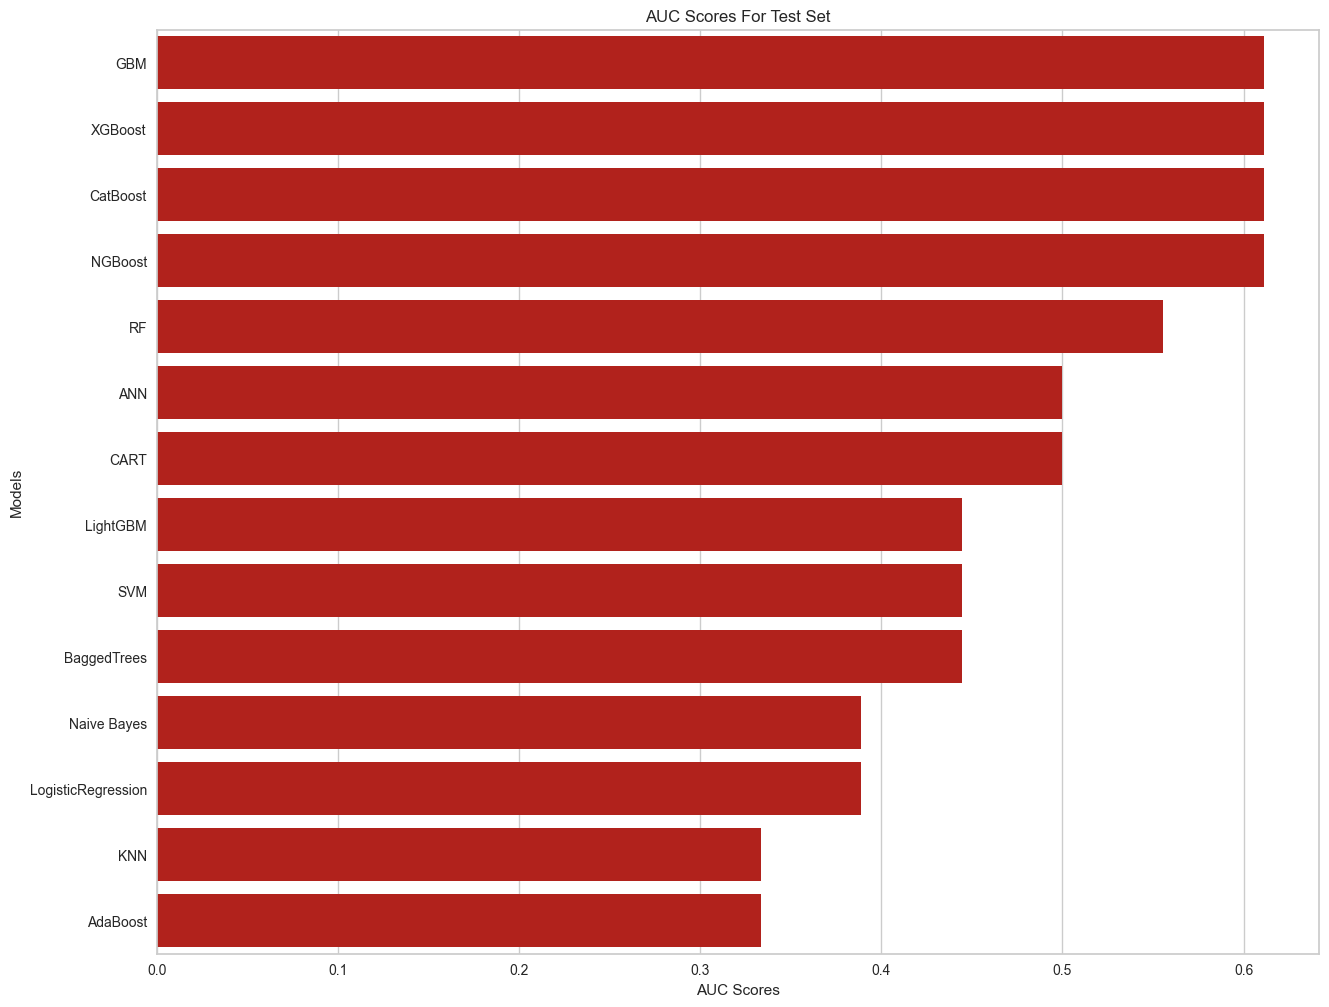

In [31]:
evaluate_classification_model_holdout(base_models)

################ Accuracy scores for test set for the models: ################

LogisticRegression: 0.388889
Naive Bayes: 0.388889
KNN: 0.333333
SVM: 0.444444
ANN: 0.444444
CART: 0.666667
BaggedTrees: 0.611111
RF: 0.500000
AdaBoost: 0.333333
GBM: 0.555556
XGBoost: 0.611111
LightGBM: 0.444444
CatBoost: 0.611111
NGBoost: 0.611111

################ Train and test results for the model: ################

                models  accuracy_train  accuracy_test
0   LogisticRegression           0.900          0.389
1          Naive Bayes           0.814          0.389
2                  KNN           0.786          0.333
3                  SVM           0.914          0.444
4                  ANN           1.000          0.444
5                 CART           1.000          0.667
6          BaggedTrees           0.986          0.611
7                   RF           1.000          0.500
8             AdaBoost           1.000          0.333
9                  GBM           1.000          0.556
10

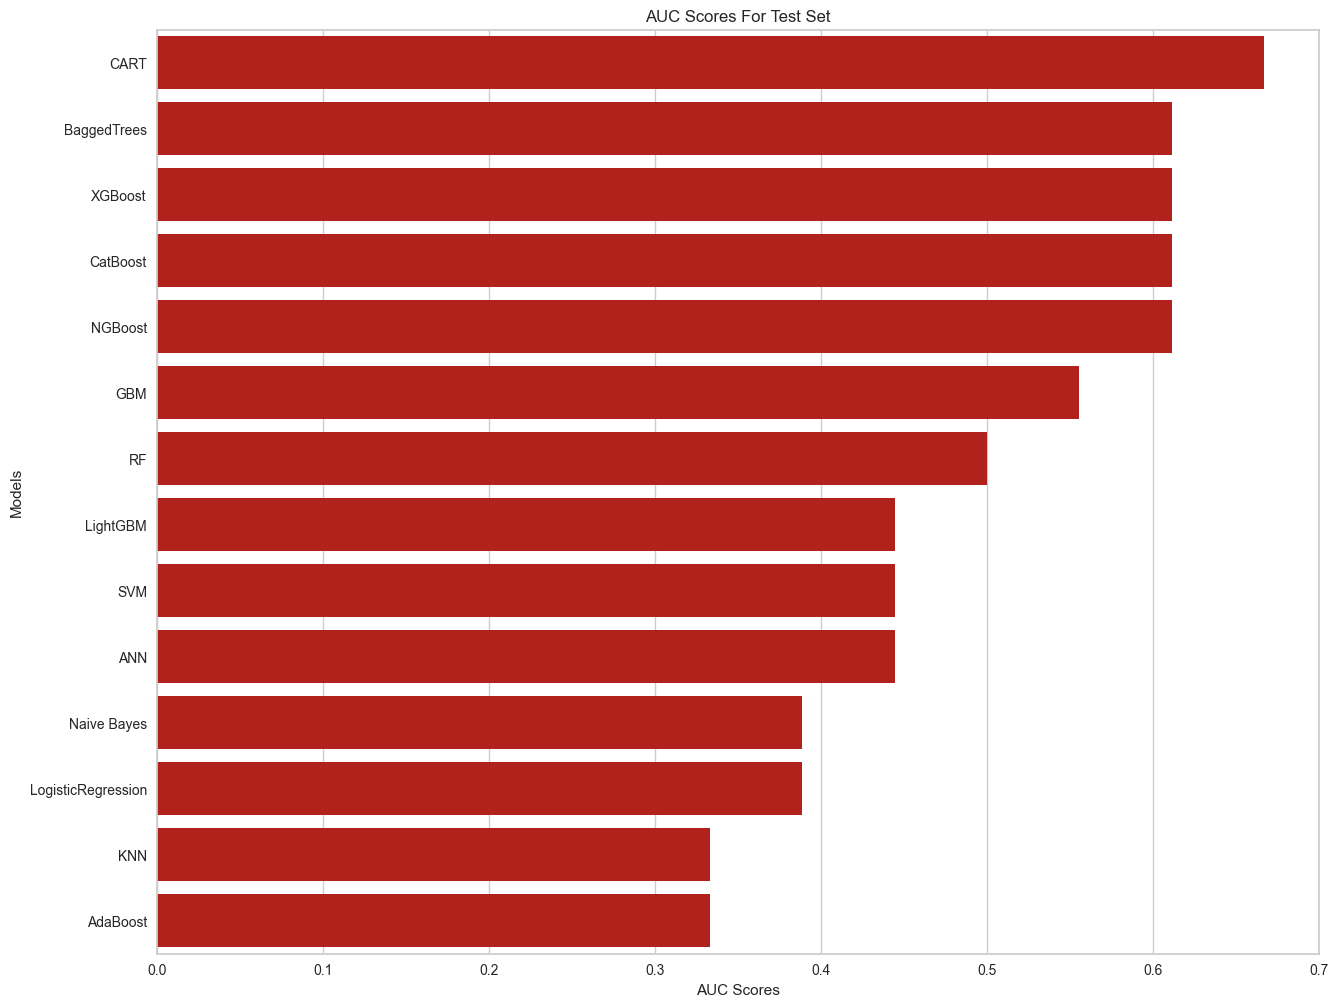

In [32]:
evaluate_classification_model_holdout(base_models)
# LogisticRegression: 0.618243
# Naive Bayes: 0.563707
# KNN: 0.605212
# SVM: 0.563707
# ANN: 0.569015
# CART: 0.542954
# BaggedTrees: 0.663127
# RF: 0.698842
# AdaBoost: 0.645270
# GBM: 0.708012
# XGBoost: 0.685811
# LightGBM: 0.663127
# CatBoost: 0.658301
# NGBoost: 0.662645   422


In [27]:
# For some distance-based models, we need to scale the features in order to
# increase the speed and the performance/accuracy level of the model.
# We can also see the effect of scaling type by changing the sclaer function.
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

################ Accuracy scores for test set for the models: ################

GaussianNB: 0.583333

################ Train and test results for the model: ################

       models  accuracy_train  accuracy_test
0  GaussianNB           0.620          0.583


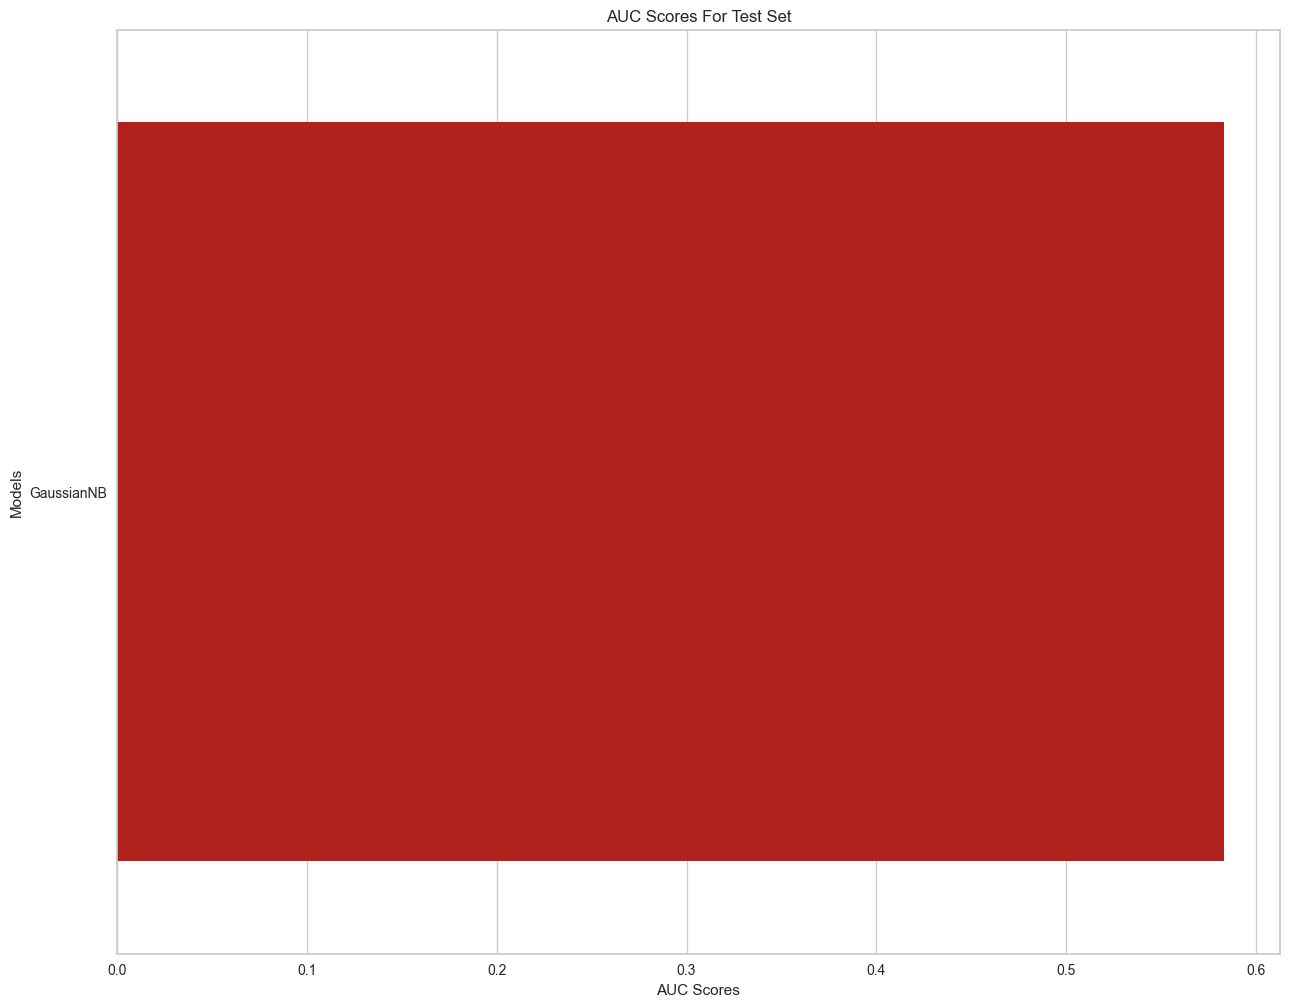

In [28]:
# LogisticRegression with make_pipeline
GNBreg = make_pipeline(MinMaxScaler(), GaussianNB())
evaluate_classification_model_holdout([('GaussianNB', GNBreg)]) # 0.805 instead of  0.805195

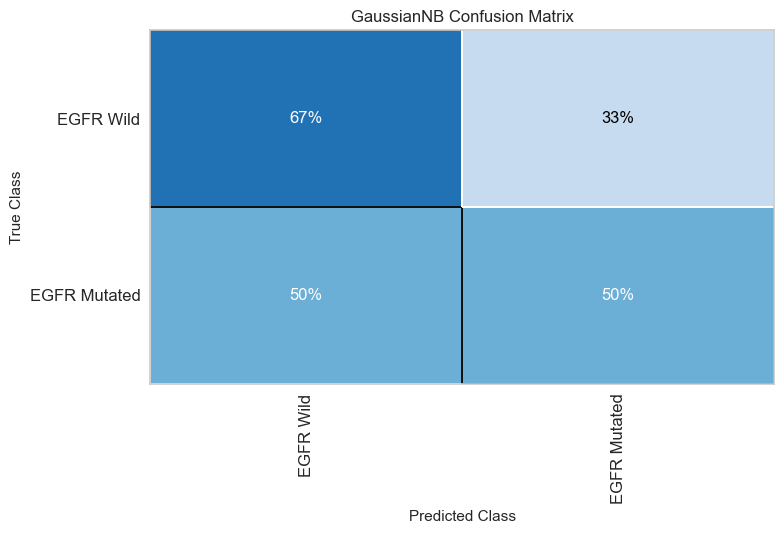

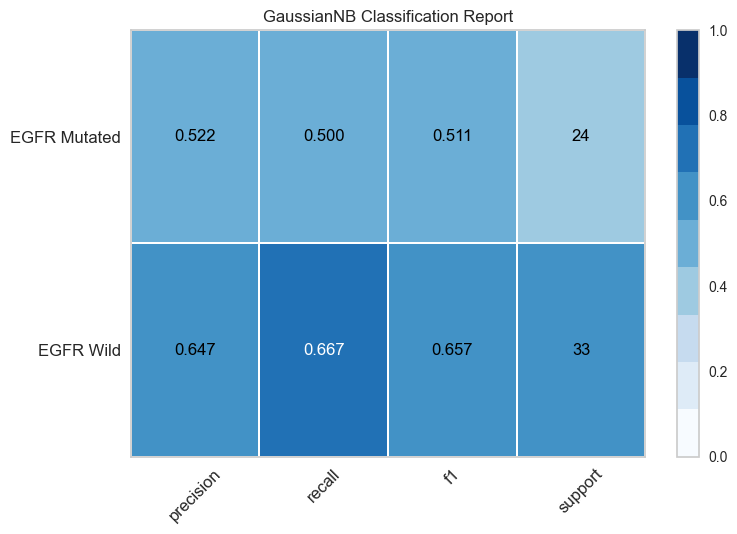

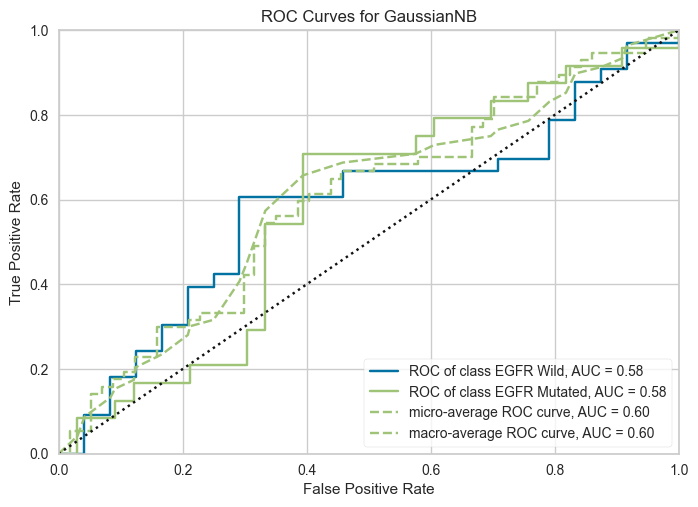

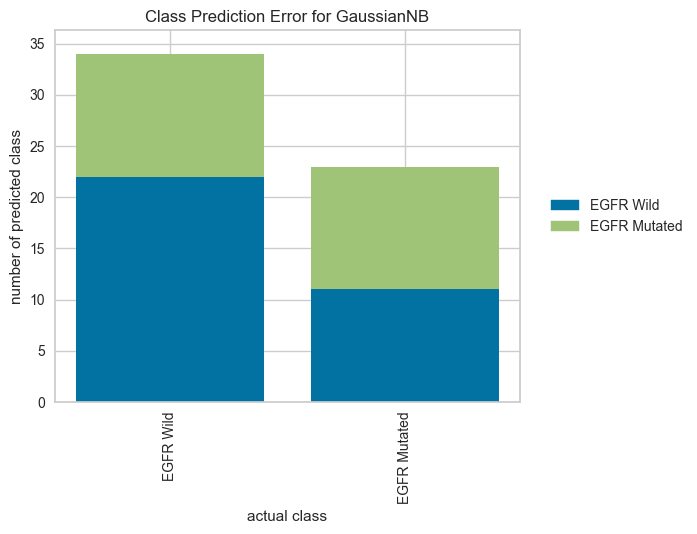

NameError: name 'X' is not defined

In [29]:
# plot_feature_importances(GNBreg)
plot_results(GNBreg)
# report_results_quickly(GNBreg)
plot_learning_curve(GNBreg)

################ Accuracy scores for test set for the models: ################

KNN: 0.585227

################ Train and test results for the model: ################

  models  accuracy_train  accuracy_test
0    KNN           0.696          0.585


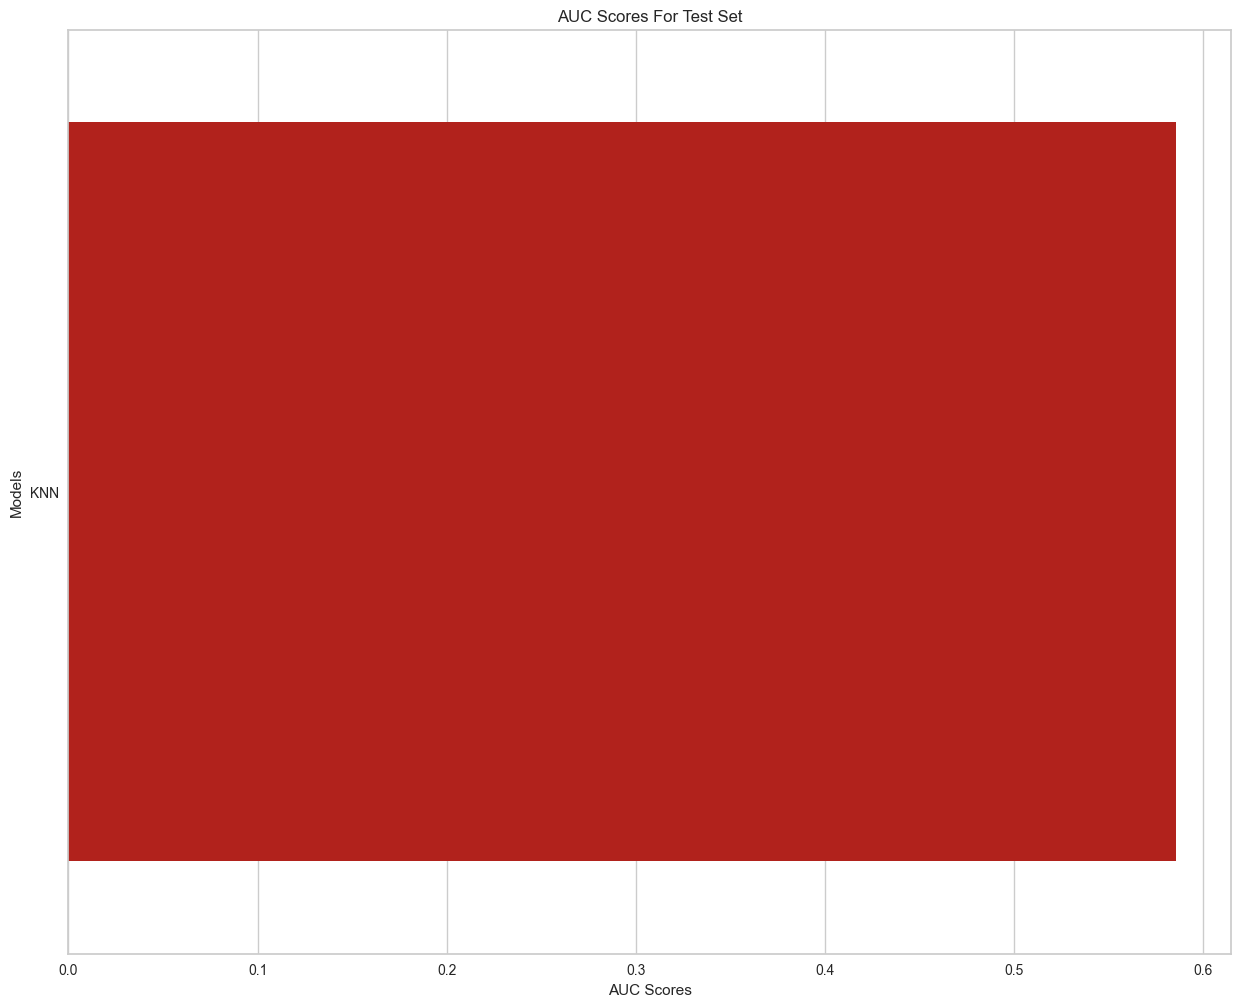

In [30]:
# LogisticRegression with make_pipeline
KNNreg = make_pipeline(MinMaxScaler(), KNeighborsClassifier())
evaluate_classification_model_holdout([('KNN', KNNreg)]) # 0.805 instead of  0.805195

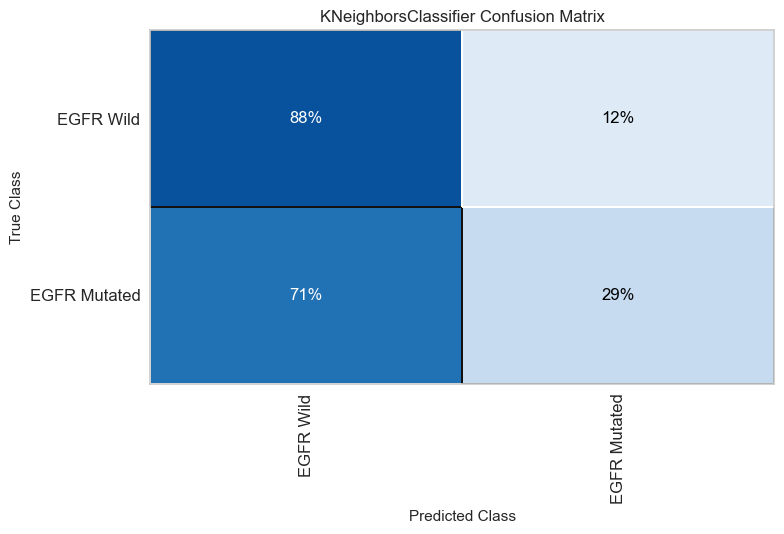

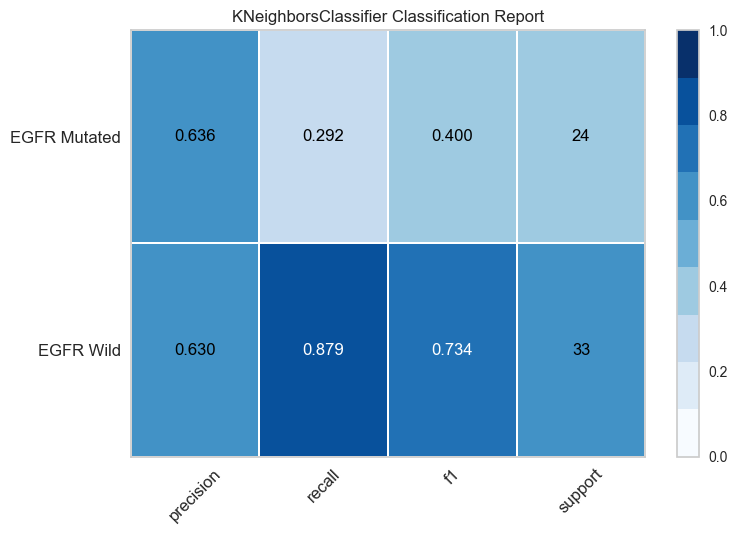

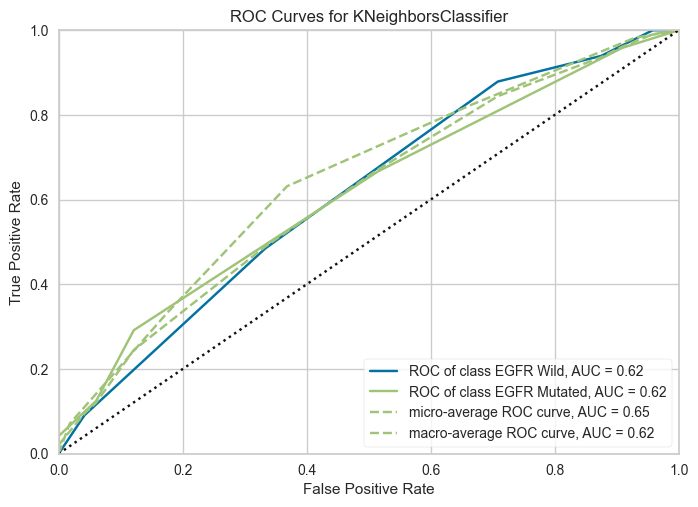

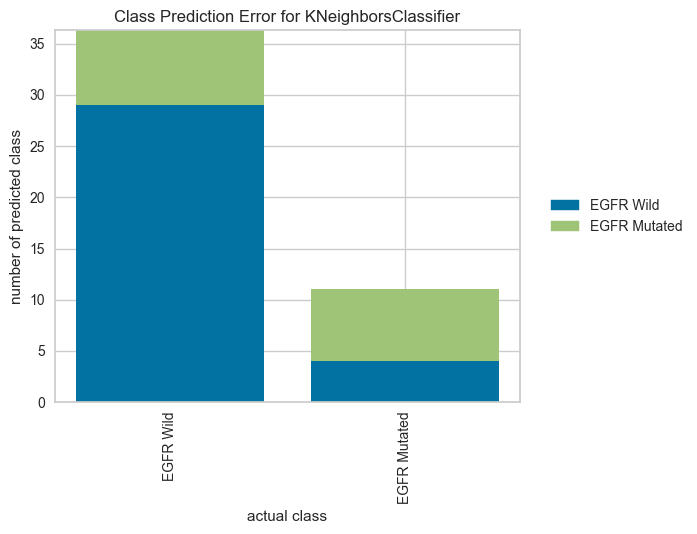

NameError: name 'X' is not defined

In [31]:
# plot_feature_importances(KNNreg)
plot_results(KNNreg)
# report_results_quickly(KNNreg)
plot_learning_curve(KNNreg)

In [ ]:
# LogisticRegression with make_pipeline
MLPreg = make_pipeline(MinMaxScaler(), MLPClassifier())
evaluate_classification_model_holdout([('MLP', MLPreg)]) # 0.805 instead of  0.805195

In [32]:
# plot_feature_importances(MLPreg)
plot_results(MLPreg)
# report_results_quickly(MLPreg)
plot_learning_curve(MLPreg)

NameError: name 'MLPreg' is not defined

################ Accuracy scores for test set for the models: ################

DT: 0.490530

################ Train and test results for the model: ################

  models  accuracy_train  accuracy_test
0     DT           1.000          0.491


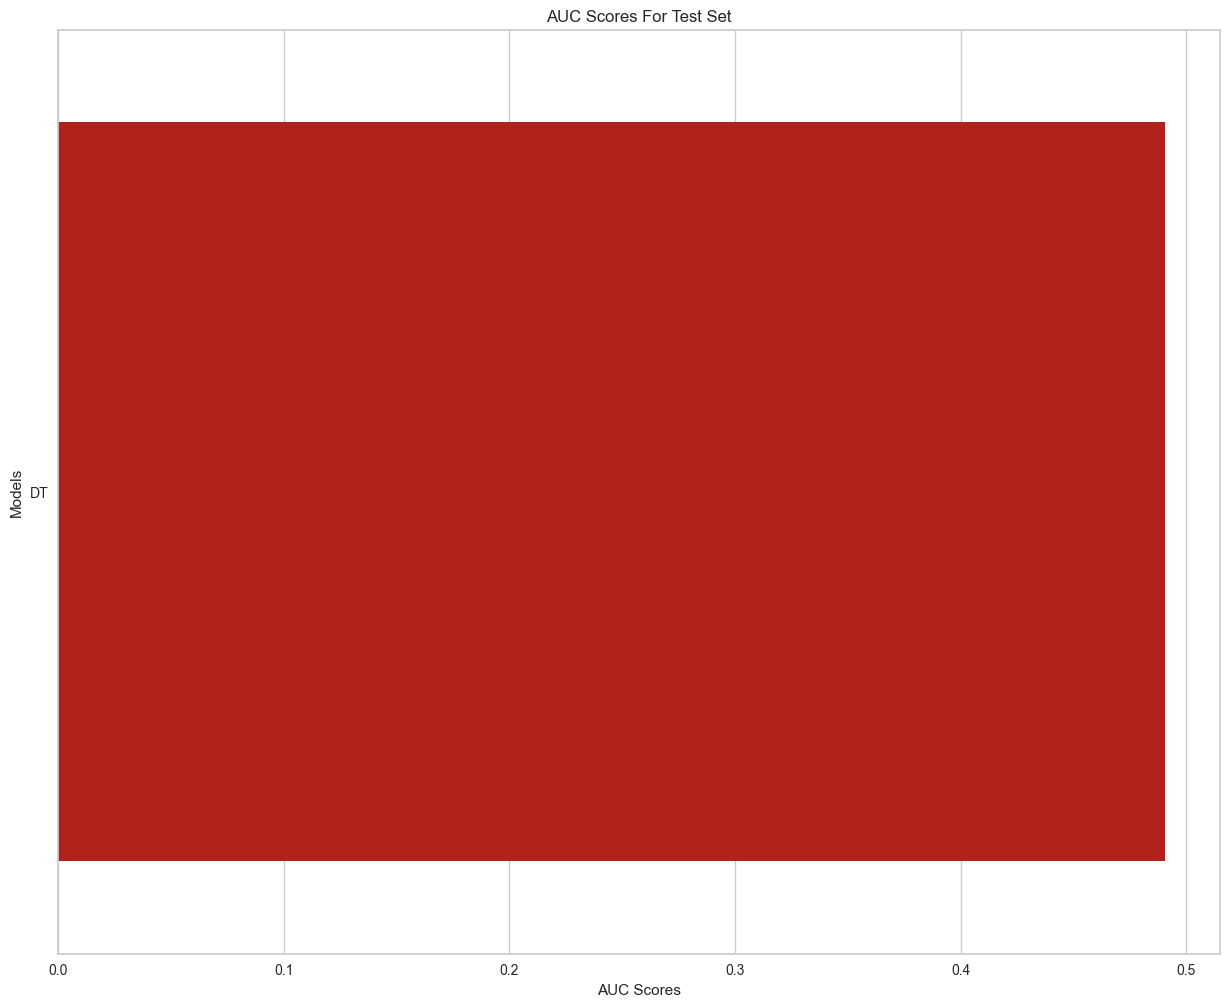

In [33]:
# LogisticRegression with make_pipeline
DTreg = make_pipeline(MinMaxScaler(), DecisionTreeClassifier())
evaluate_classification_model_holdout([('DT', DTreg)]) # 0.805 instead of  0.805195

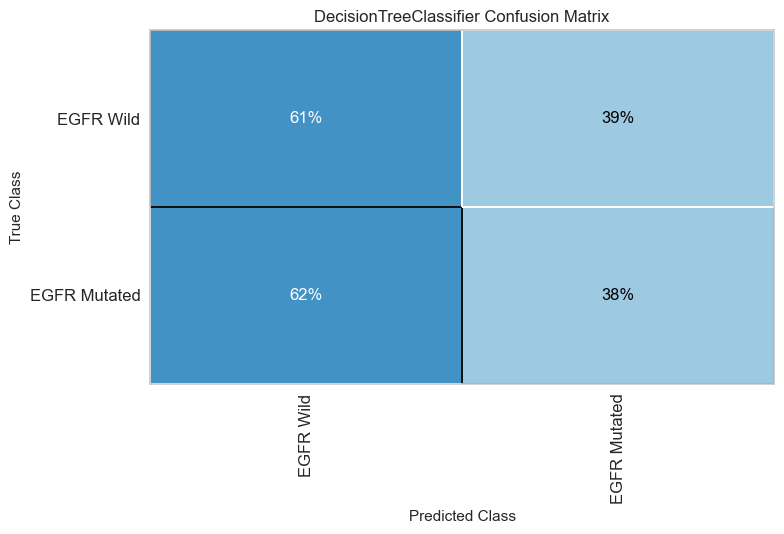

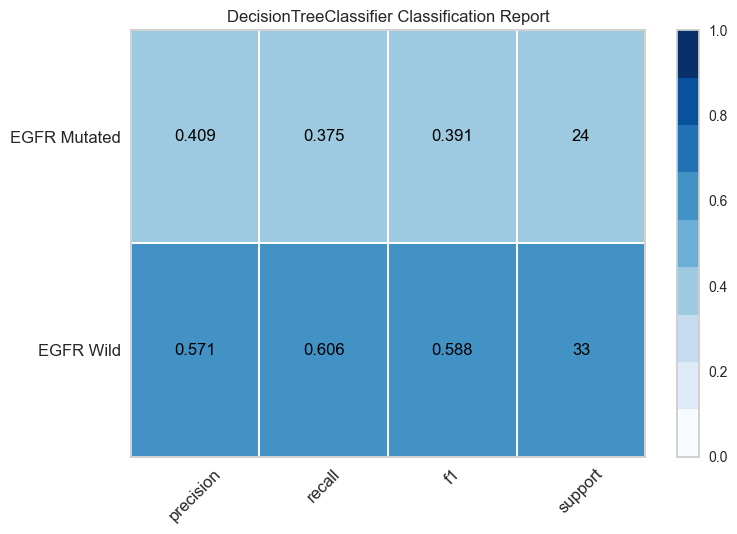

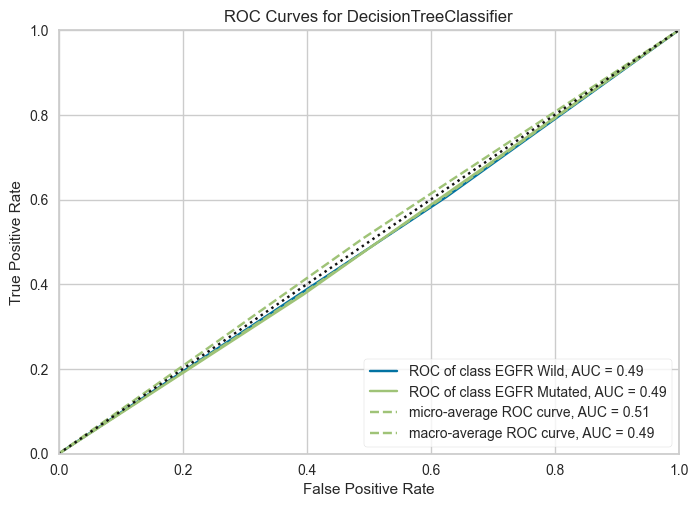

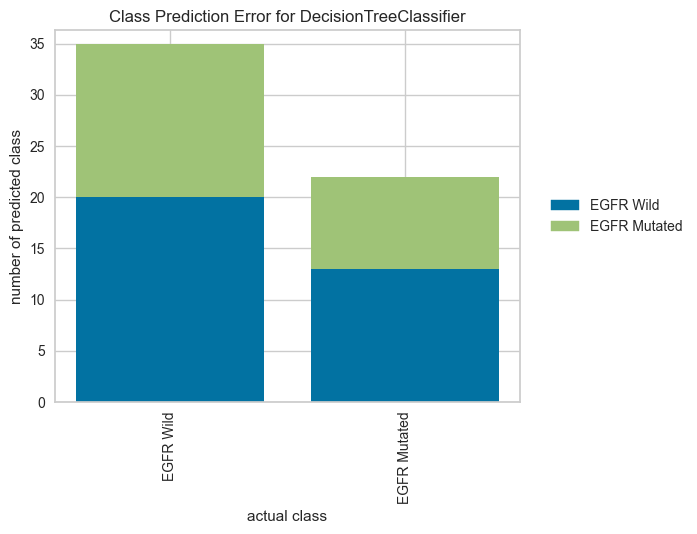

NameError: name 'X' is not defined

In [34]:
# plot_feature_importances(DTreg)
plot_results(DTreg)
# report_results_quickly(DTreg)
plot_learning_curve(DTreg)

################ Accuracy scores for test set for the models: ################

BC: 0.507576

################ Train and test results for the model: ################

  models  accuracy_train  accuracy_test
0     BC           0.976          0.508


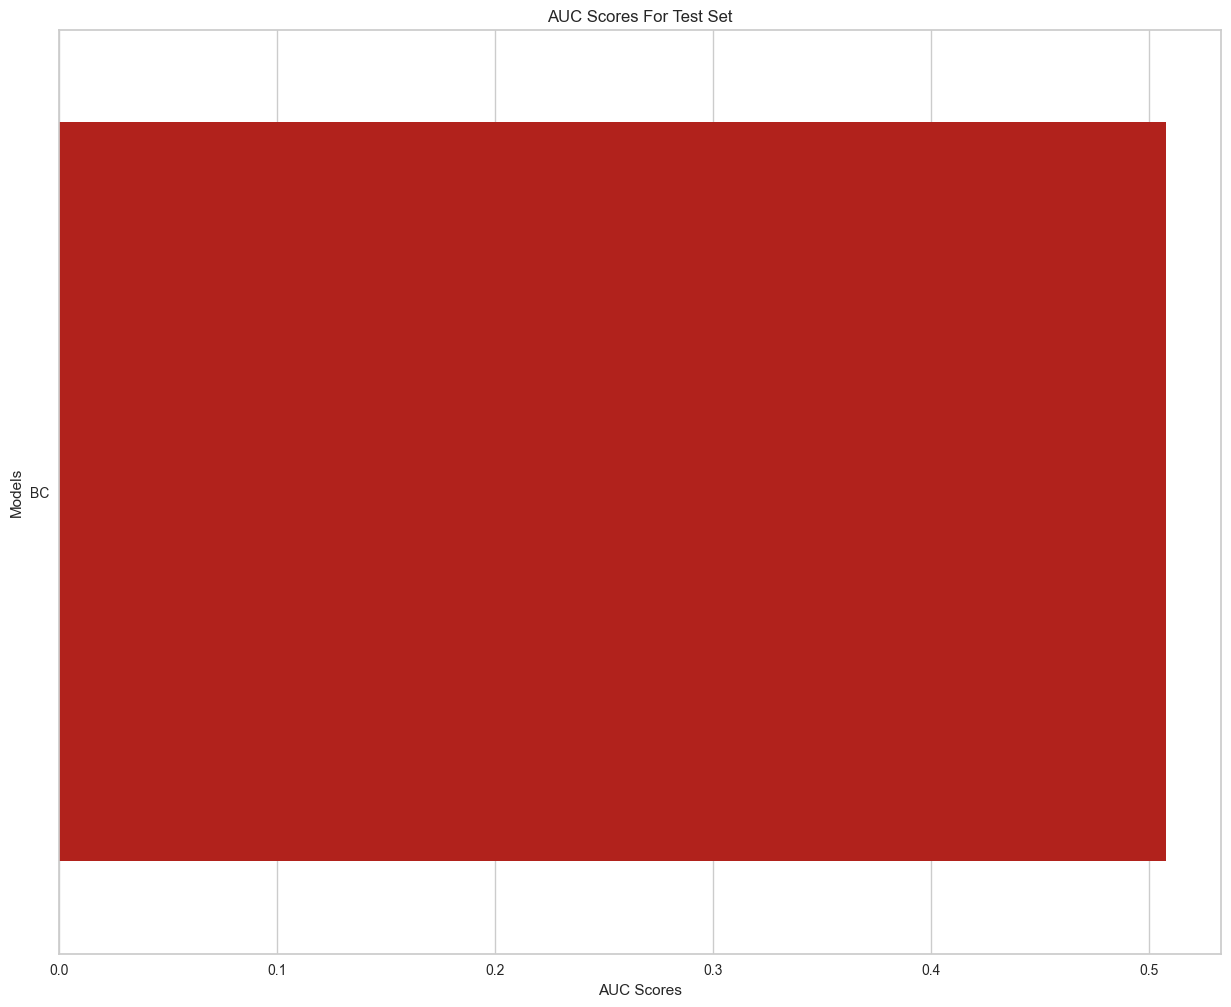

In [35]:
# LogisticRegression with make_pipeline
BCreg = make_pipeline(MinMaxScaler(), BaggingClassifier())
evaluate_classification_model_holdout([('BC', BCreg)]) # 0.805 instead of  0.805195

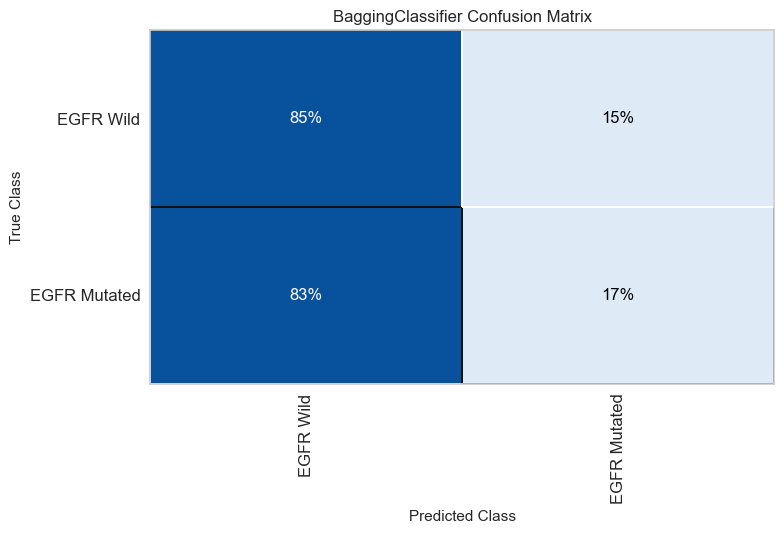

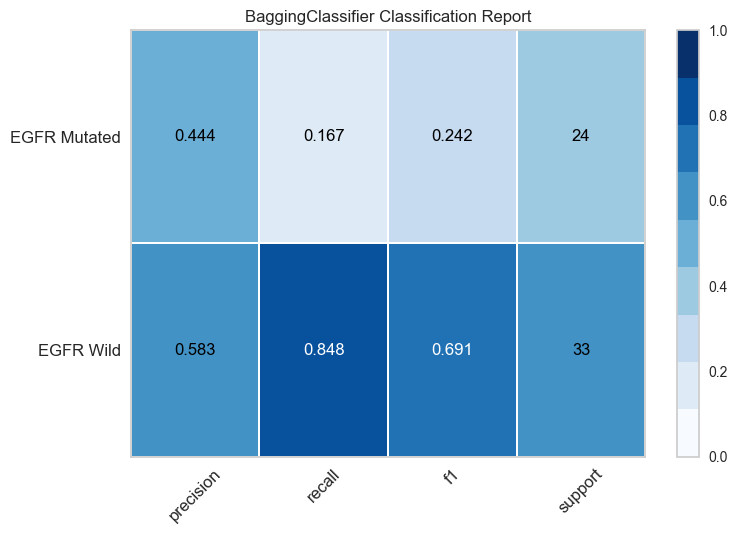

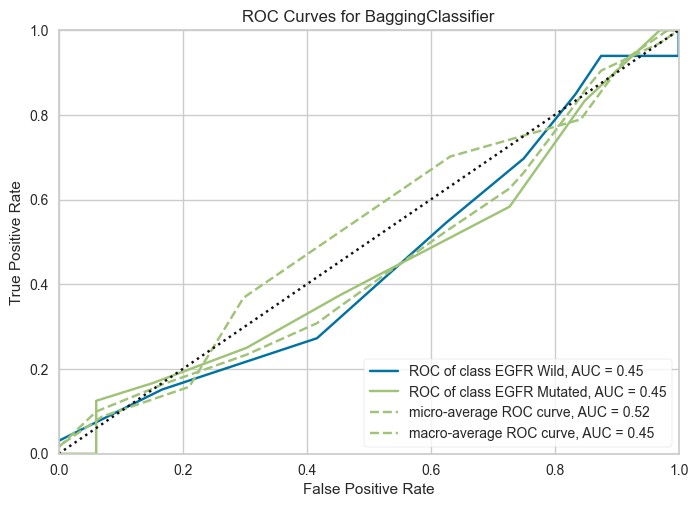

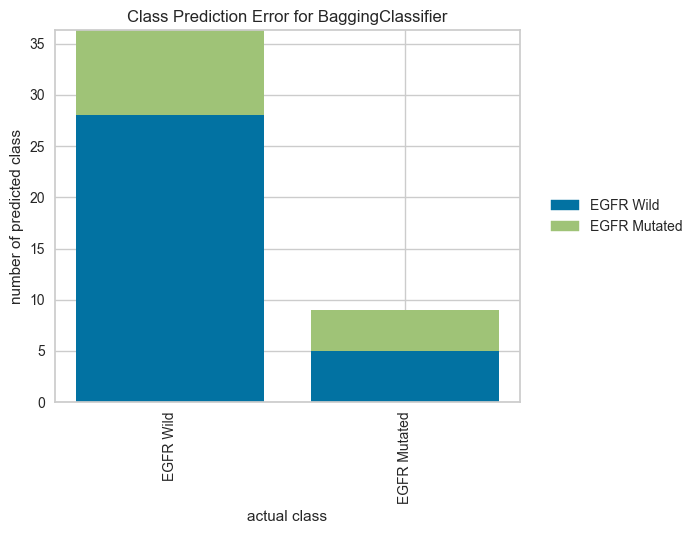

NameError: name 'X' is not defined

In [36]:
# plot_feature_importances(BCreg)
plot_results(BCreg)
# report_results_quickly(BCreg)
plot_learning_curve(BCreg)

################ Accuracy scores for test set for the models: ################

GBM: 0.482955

################ Train and test results for the model: ################

  models  accuracy_train  accuracy_test
0    GBM           1.000          0.483


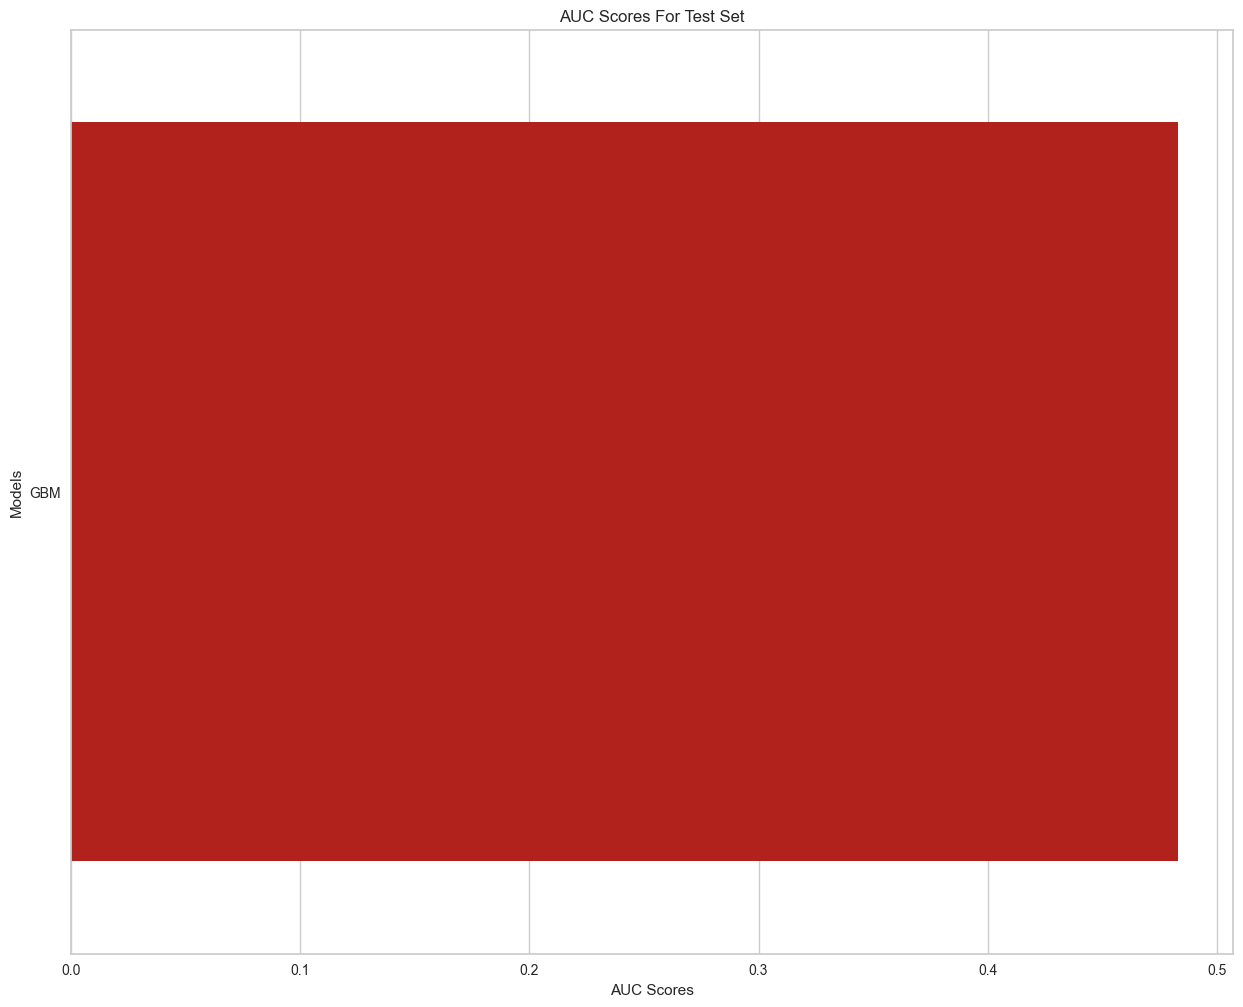

In [37]:
# LogisticRegression with make_pipeline
GBMreg = make_pipeline(MinMaxScaler(), GradientBoostingClassifier())
evaluate_classification_model_holdout([('GBM', GBMreg)]) # 0.805 instead of  0.805195

In [ ]:
# plot_feature_importances(GBMreg)
plot_results(GBMreg)
# report_results_quickly(GBMreg)
plot_learning_curve(GBMreg)

In [ ]:
# LogisticRegression with make_pipeline
ABreg = make_pipeline(MinMaxScaler(), AdaBoostClassifier())
evaluate_classification_model_holdout([('AB', ABreg)]) # 0.805 instead of  0.805195

In [ ]:
# plot_feature_importances(ABreg)
plot_results(ABreg)
# report_results_quickly(ABreg)
plot_learning_curve(ABreg)

In [ ]:
# LogisticRegression with make_pipeline
ngbreg = make_pipeline(MinMaxScaler(), NGBClassifier(verbose=False))
evaluate_classification_model_holdout([('NGBClassifier', ngbreg)]) # 0.805 instead of  0.805195

In [ ]:
# plot_feature_importances(ngbreg)
# plot_results(ngbreg)
# report_results_quickly(ngbreg)
# plot_learning_curve(ngbreg)

In [ ]:
# KNN with make_pipeline
knn = make_pipeline(RobustScaler(), KNeighborsClassifier())
evaluate_classification_model_holdout([('KNN', knn)]) # 0.857 instead of 0.850649

In [ ]:
# plot_feature_importances(knn)
plot_results(knn)
# report_results_quickly(knn)
plot_learning_curve(knn)

In [ ]:
# SVC with make_pipeline
svc = make_pipeline(RobustScaler(), SVC())
evaluate_classification_model_holdout([('SVM', svc)]) # 0.864 instead of 0.837662

In [ ]:
# plot_feature_importances(svc)
plot_results(svc)
# report_results_quickly(svc)
plot_learning_curve(svc)

In [ ]:
# ANN with make_pipeline
ann = make_pipeline(StandardScaler(), MLPClassifier())
evaluate_classification_model_holdout([('ANN', ann)]) # 0.857 instead of 0.850649

In [33]:
# MODEL TUNING

'''
Models to be tuned:
    - LogisticRegression
    - RandomForestClassifier
    -SVM
    - LightGBMClassifier
    - XGBClassifier
'''

# LogisticRegression # 0.805195

logreg_model = LogisticRegression(random_state=42)
logreg_params = {'penalty': ['l1', 'l2'],
                 'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25]}
logreg_cv_model = GridSearchCV(logreg_model, logreg_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
logreg_cv_model.best_params_ # {'C': 1, 'penalty': 'l2'}

Fitting 10 folds for each of 16 candidates, totalling 160 fits


C:\Users\zuoya\.conda\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\zuoya\.conda\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\zuoya\.conda\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\zuoya\.conda\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py", line 449, in _check_solver
    %

{'C': 5, 'penalty': 'l2'}

In [34]:
# Final Model
logreg_tuned = LogisticRegression(**logreg_cv_model.best_params_).fit(X_train, y_train)
y_pred = logreg_tuned.predict(X_test)
# accuracy_score(y_test, y_pred) # 0.8051948051948052
roc_auc_score(y_test, y_pred)

0.4444444444444445

In [35]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-LR-RFFI', Save_format = 'csv',Save_type = 'col')

In [36]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-LR-RFFI.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR E19", "EGFR E21"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.43      0.33      0.38         9
    EGFR E21       0.45      0.56      0.50         9

    accuracy                           0.44        18
   macro avg       0.44      0.44      0.44        18
weighted avg       0.44      0.44      0.44        18

precision 0.45454545454545453 accuracy 0.4444444444444444 recall 0.5555555555555556 auc 0.4444444444444445


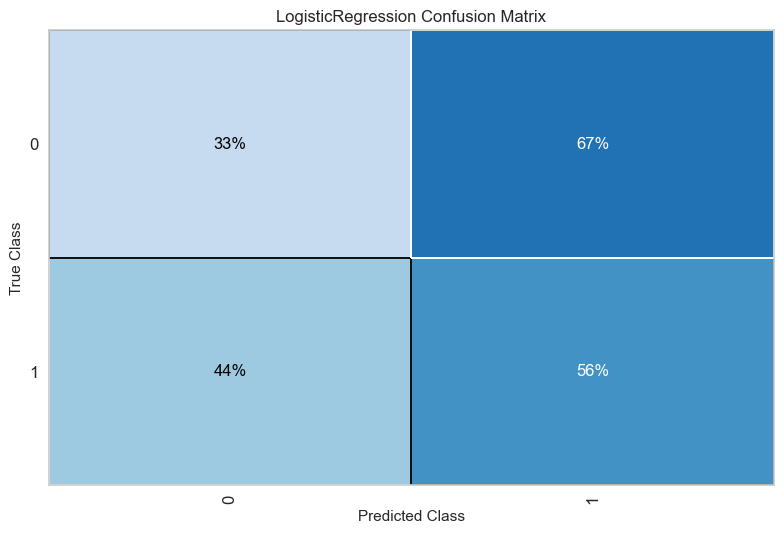

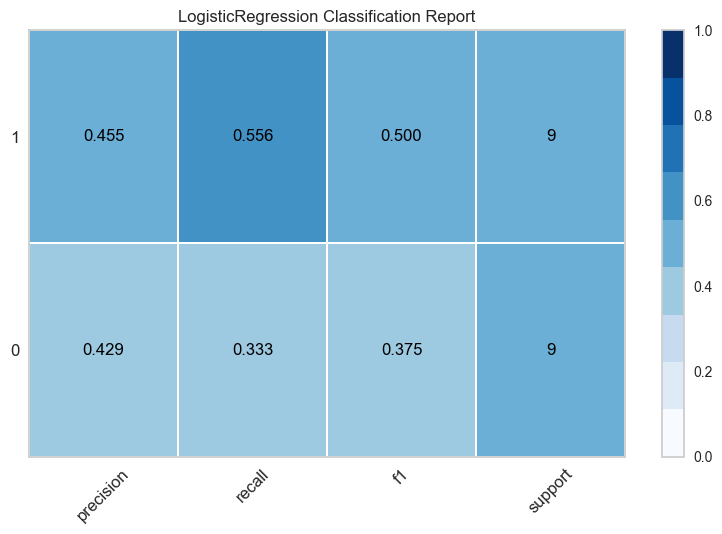

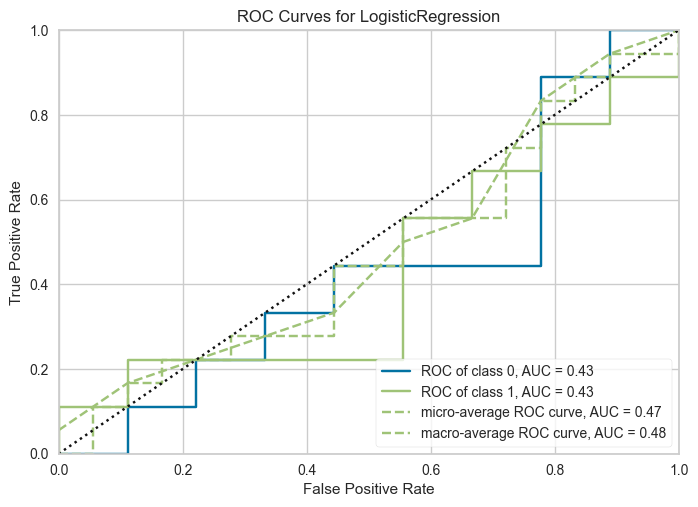

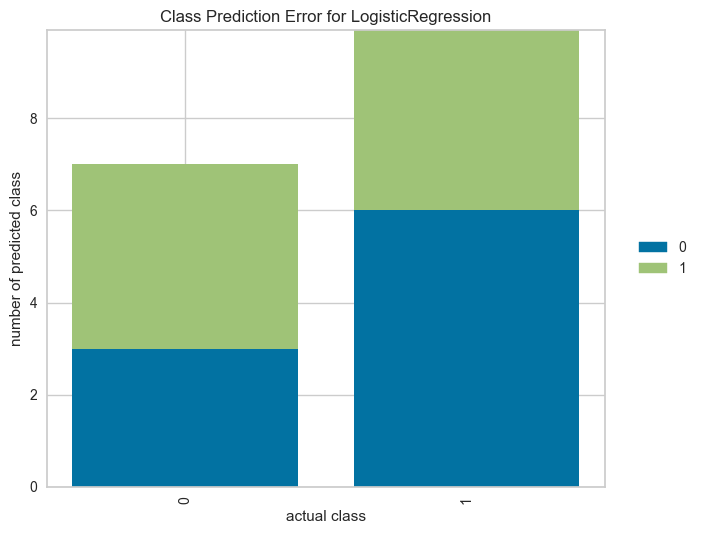

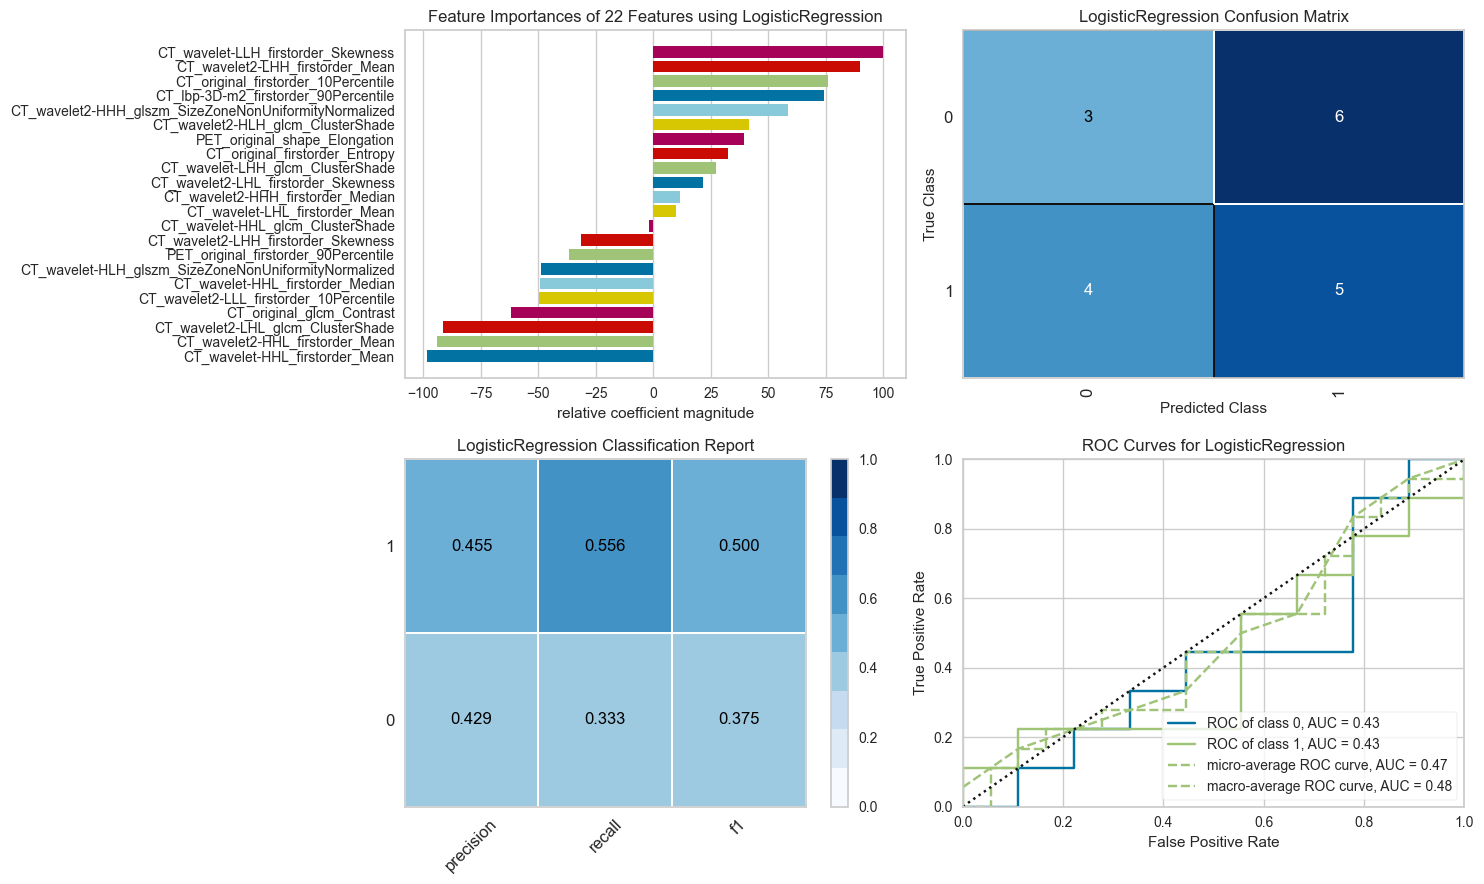

NameError: name 'X' is not defined

In [37]:
# Visualization of Results
# plot_feature_importances(logreg_tuned)
plot_results(logreg_tuned)
report_results_quickly(logreg_tuned)
plot_learning_curve(logreg_tuned)


In [38]:
# RandomForestClassifier # 0.876623

rf_model = RandomForestClassifier(random_state=42)
rf_params = {"n_estimators": [500, 800,1000,2000,3000,5000],
             "min_samples_split": [2, 5,7,8,9, 10,15,20, 30],
             "max_depth": [1,2,3,4, 5, 8, None]}

rf_cv_model = GridSearchCV(rf_model, rf_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
rf_cv_model.best_params_ # {'max_depth': None, 'min_samples_split': 7, 'n_estimators': 200}

Fitting 10 folds for each of 378 candidates, totalling 3780 fits


{'max_depth': 4, 'min_samples_split': 9, 'n_estimators': 500}

In [39]:
rf_cv_model.best_params_   #0.6425000000000001   {'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 10}

{'max_depth': 4, 'min_samples_split': 9, 'n_estimators': 500}

In [40]:
# Final Model
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
rf_tuned = RandomForestClassifier(**rf_cv_model.best_params_).fit(X_train, y_train)
y_pred = rf_tuned.predict(X_test)
# accuracy_score(y_test, y_pred) # 0.8831168831168831
roc_auc_score(y_test, y_pred)

0.5

In [41]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-RFFI-RF73', Save_format = 'csv',Save_type = 'col')

In [42]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-RFFI-RF73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR E19", "EGFR E21"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.50      0.44      0.47         9
    EGFR E21       0.50      0.56      0.53         9

    accuracy                           0.50        18
   macro avg       0.50      0.50      0.50        18
weighted avg       0.50      0.50      0.50        18

precision 0.5 accuracy 0.5 recall 0.5555555555555556 auc 0.5


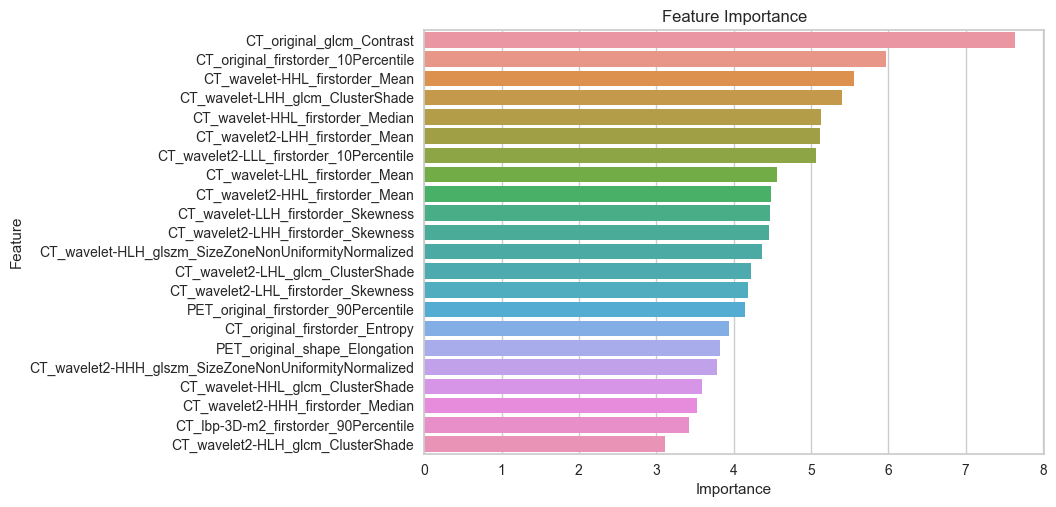

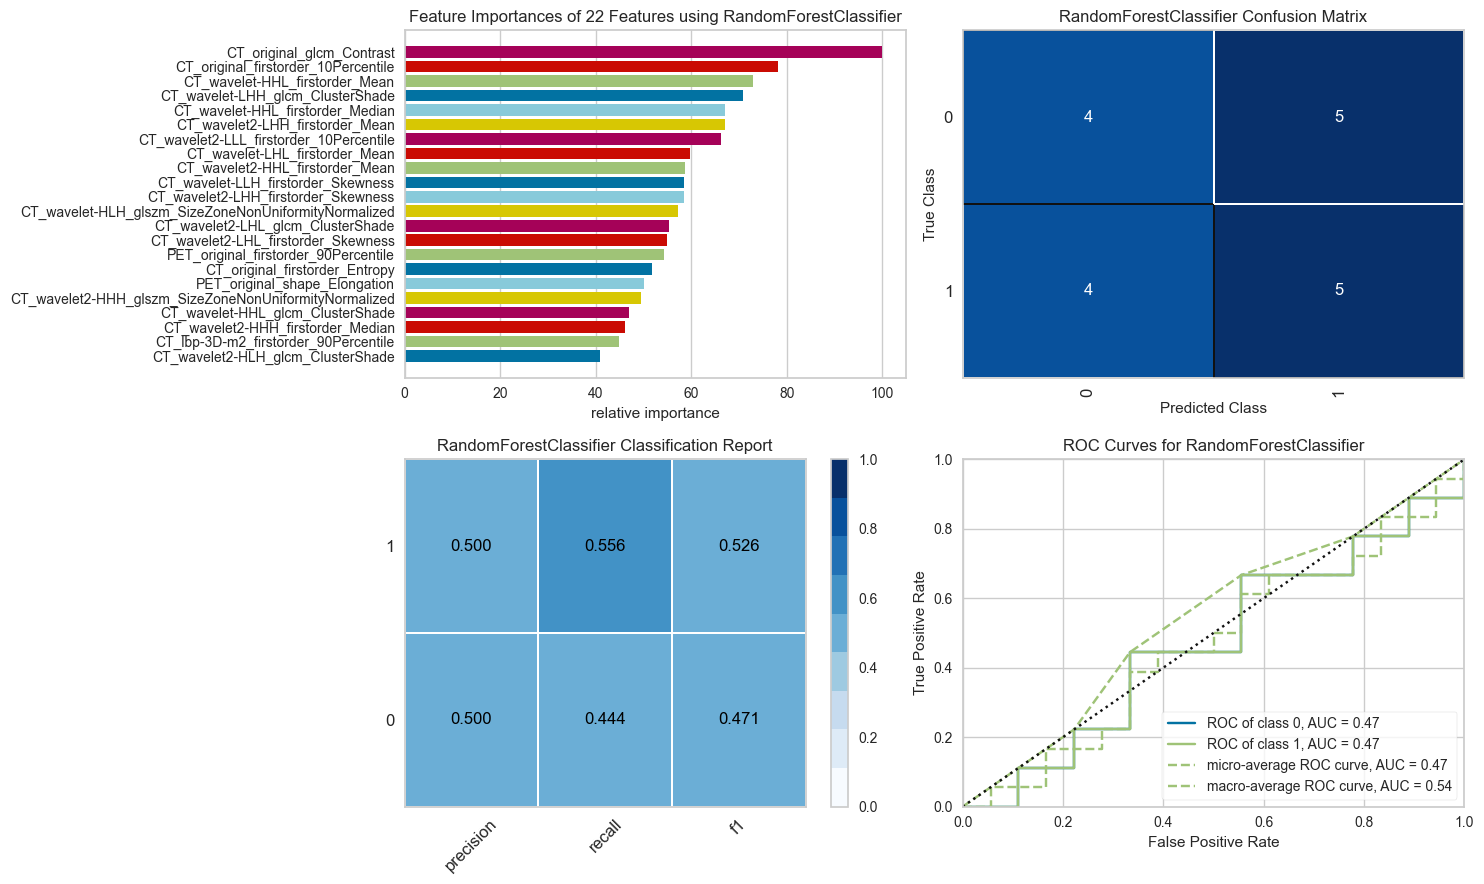

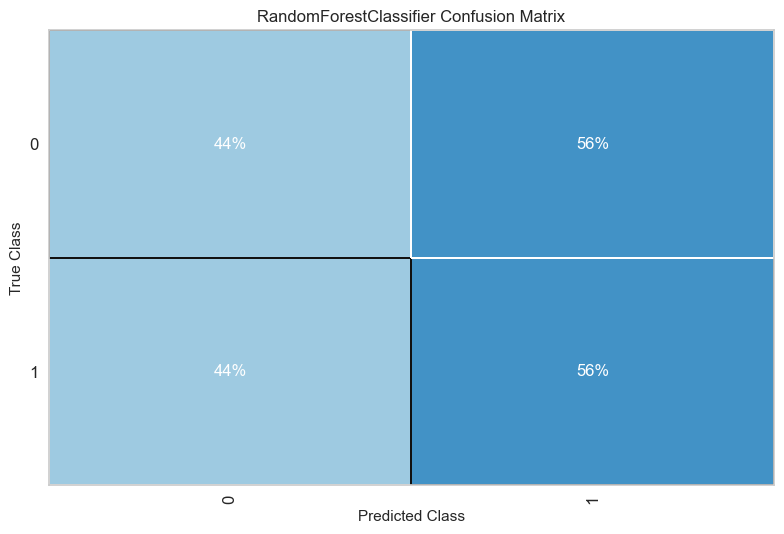

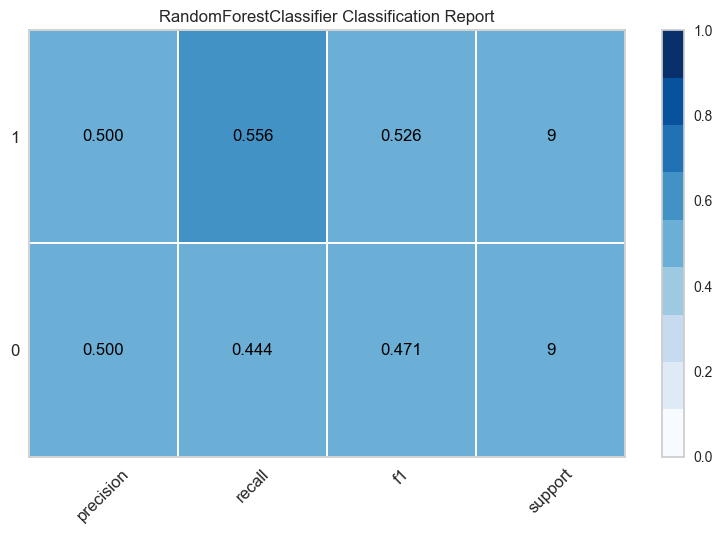

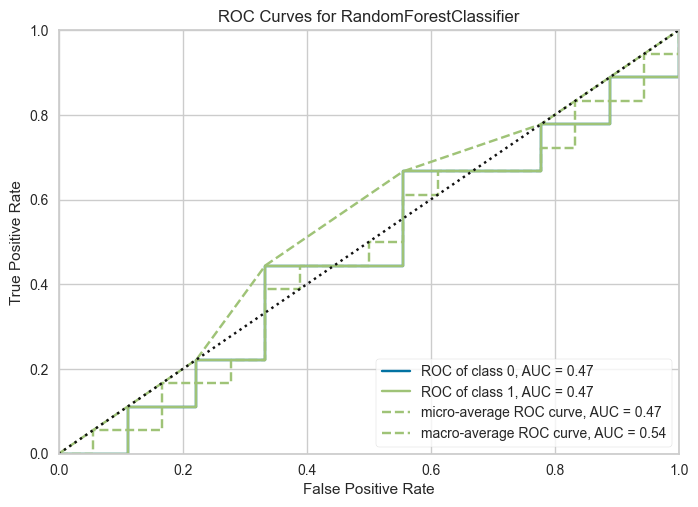

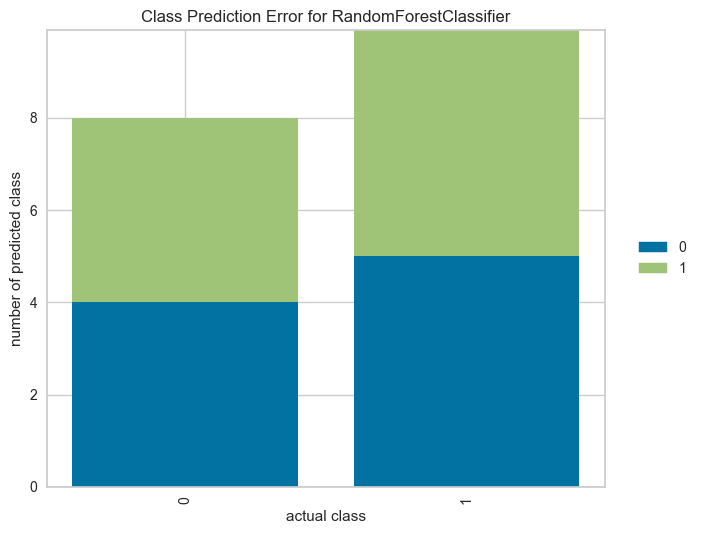

NameError: name 'X' is not defined

In [43]:
# Visualization of Results --> Feature Importances
plot_feature_importances(rf_tuned)
report_results_quickly(rf_tuned)
plot_results(rf_tuned)
plot_learning_curve(rf_tuned)

In [50]:
# CatBoostClassifier # 0.883117

from yellowbrick.contrib.wrapper import wrap
cb_model = CatBoostClassifier()
                                        
cb_params = {
#     'depth': [1,2,3,4, 6, 10],
          'learning_rate' : [0.01,0.03,0.05,0.15,0.1,0.3],
#          'l2_leaf_reg': [1,4,9],
         'iterations': [200,300,500,800,1200,2000],
          'early_stopping_rounds':[2000,3000],
#              'subsample':[0.5,1.0],
             'max_depth':[1,3,5,6,8,10, None]
#              'n_estimators':[1000,3000,5000] 
#           'task_type':['GPU'],
#           'loss_function':['Binary'],
          
         }
# {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5000, 'subsample': 0.5}

cb_cv_model = GridSearchCV(cb_model, cb_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
cb_cv_model.best_params_ # {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.9}


Fitting 10 folds for each of 504 candidates, totalling 5040 fits
0:	learn: 0.6758079	total: 899us	remaining: 269ms
1:	learn: 0.6590663	total: 7.65ms	remaining: 1.14s
2:	learn: 0.6464687	total: 8.64ms	remaining: 855ms
3:	learn: 0.6363821	total: 9.58ms	remaining: 709ms
4:	learn: 0.6267510	total: 10.4ms	remaining: 613ms
5:	learn: 0.6173990	total: 11.1ms	remaining: 545ms
6:	learn: 0.6039657	total: 11.8ms	remaining: 493ms
7:	learn: 0.5926899	total: 12.5ms	remaining: 457ms
8:	learn: 0.5818036	total: 13.4ms	remaining: 432ms
9:	learn: 0.5698009	total: 14.1ms	remaining: 409ms
10:	learn: 0.5638350	total: 14.9ms	remaining: 391ms
11:	learn: 0.5591757	total: 15.6ms	remaining: 374ms
12:	learn: 0.5555338	total: 16.8ms	remaining: 370ms
13:	learn: 0.5443391	total: 17.8ms	remaining: 363ms
14:	learn: 0.5270611	total: 18.6ms	remaining: 353ms
15:	learn: 0.5172092	total: 19.3ms	remaining: 342ms
16:	learn: 0.5115927	total: 20.1ms	remaining: 335ms
17:	learn: 0.5040909	total: 21.9ms	remaining: 343ms
18:	learn:

{'early_stopping_rounds': 2000,
 'iterations': 300,
 'learning_rate': 0.05,
 'max_depth': 3}

In [51]:
# Final Model
cb_tuned = CatBoostClassifier(**cb_cv_model.best_params_).fit(X_train, y_train,use_best_model=True)

y_pred = cb_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766

0:	learn: 0.6758079	total: 844us	remaining: 252ms
1:	learn: 0.6590663	total: 1.45ms	remaining: 216ms
2:	learn: 0.6464687	total: 1.96ms	remaining: 194ms
3:	learn: 0.6363821	total: 2.47ms	remaining: 183ms
4:	learn: 0.6267510	total: 2.96ms	remaining: 175ms
5:	learn: 0.6173990	total: 3.42ms	remaining: 168ms
6:	learn: 0.6039657	total: 3.91ms	remaining: 164ms
7:	learn: 0.5926899	total: 4.32ms	remaining: 158ms
8:	learn: 0.5818036	total: 4.75ms	remaining: 154ms
9:	learn: 0.5698009	total: 5.19ms	remaining: 151ms
10:	learn: 0.5638350	total: 5.64ms	remaining: 148ms
11:	learn: 0.5591757	total: 6.08ms	remaining: 146ms
12:	learn: 0.5555338	total: 6.52ms	remaining: 144ms
13:	learn: 0.5443391	total: 6.99ms	remaining: 143ms
14:	learn: 0.5270611	total: 7.47ms	remaining: 142ms
15:	learn: 0.5172092	total: 7.89ms	remaining: 140ms
16:	learn: 0.5115927	total: 8.33ms	remaining: 139ms
17:	learn: 0.5040909	total: 8.84ms	remaining: 138ms
18:	learn: 0.4956548	total: 9.32ms	remaining: 138ms
19:	learn: 0.4892906	to

You should provide test set for use best model. use_best_model parameter has been switched to false value.


0.5

In [52]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(cb_tuned)
shap_values = explainer.shap_values(X_train)

# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

In [53]:
# shap.dependence_plot(y_train, shap_values, X_train)

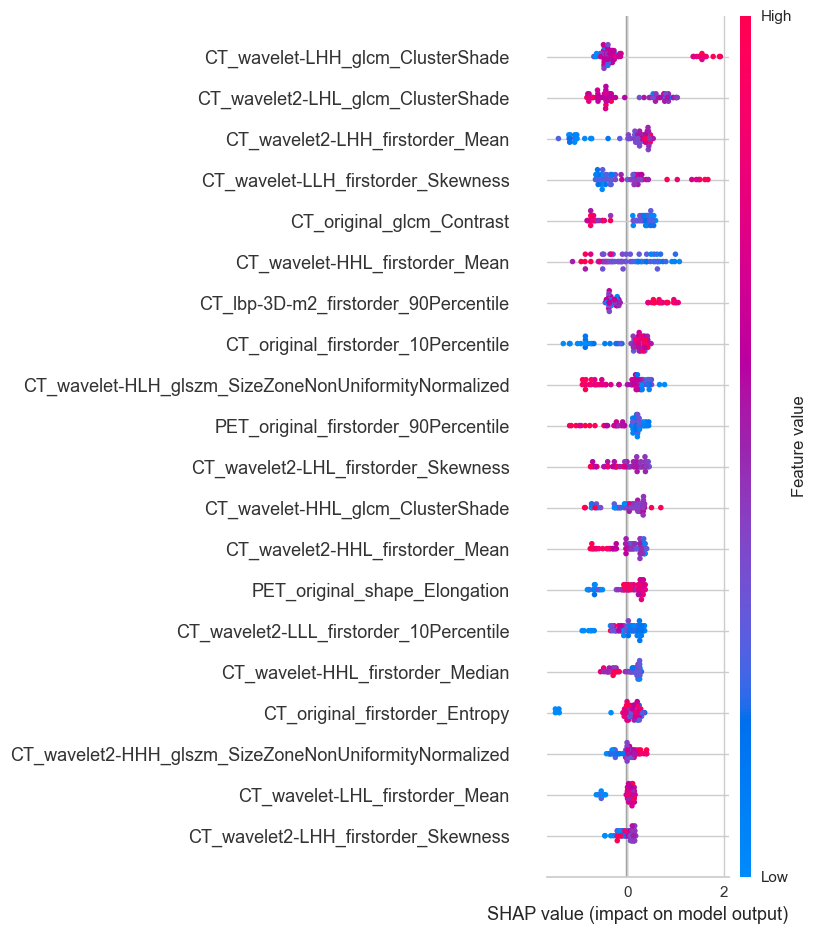

In [54]:

shap.summary_plot(shap_values, X_train)

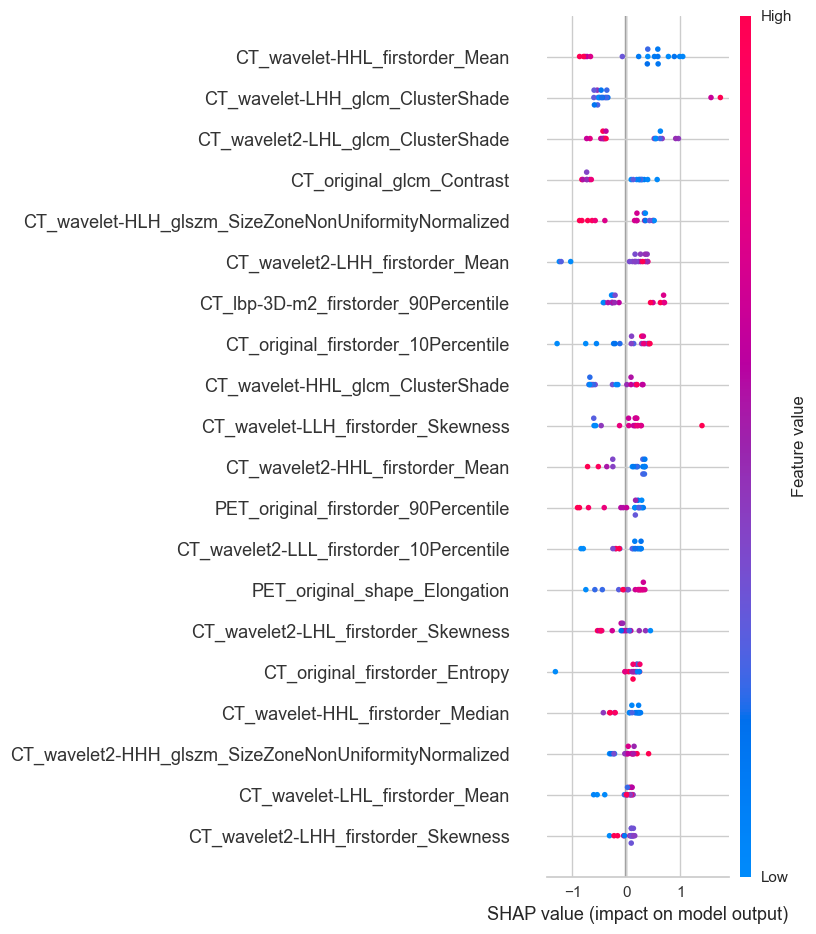

In [55]:
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [56]:
import shap
explainer = shap.TreeExplainer(cb_tuned)
shap_values = explainer.shap_values(X_test)

# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

In [57]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca--RFFI-CBC73', Save_format = 'csv',Save_type = 'col')

In [58]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca--RFFI-CBC73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR E19", "EGFR E21"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.50      0.44      0.47         9
    EGFR E21       0.50      0.56      0.53         9

    accuracy                           0.50        18
   macro avg       0.50      0.50      0.50        18
weighted avg       0.50      0.50      0.50        18

precision 0.5 accuracy 0.5 recall 0.5555555555555556 auc 0.5


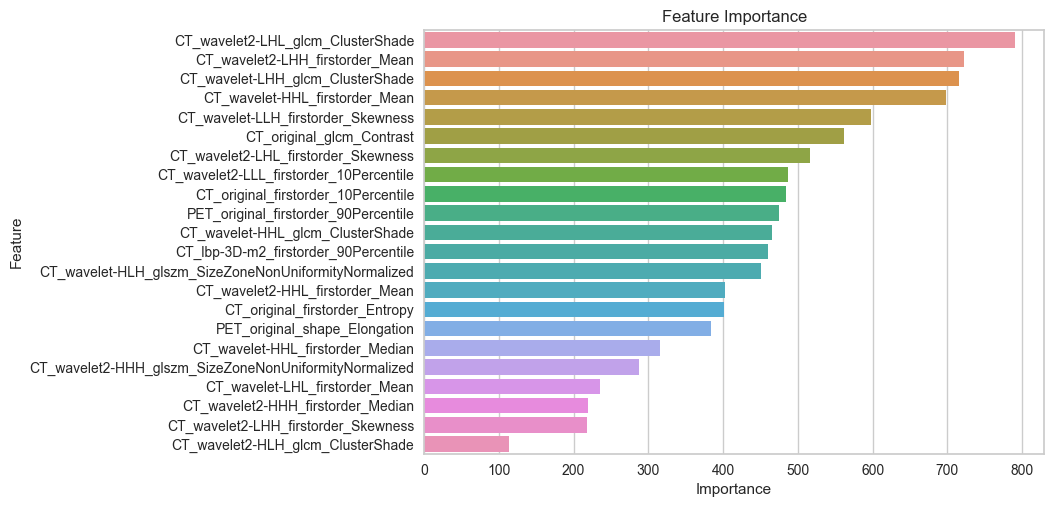

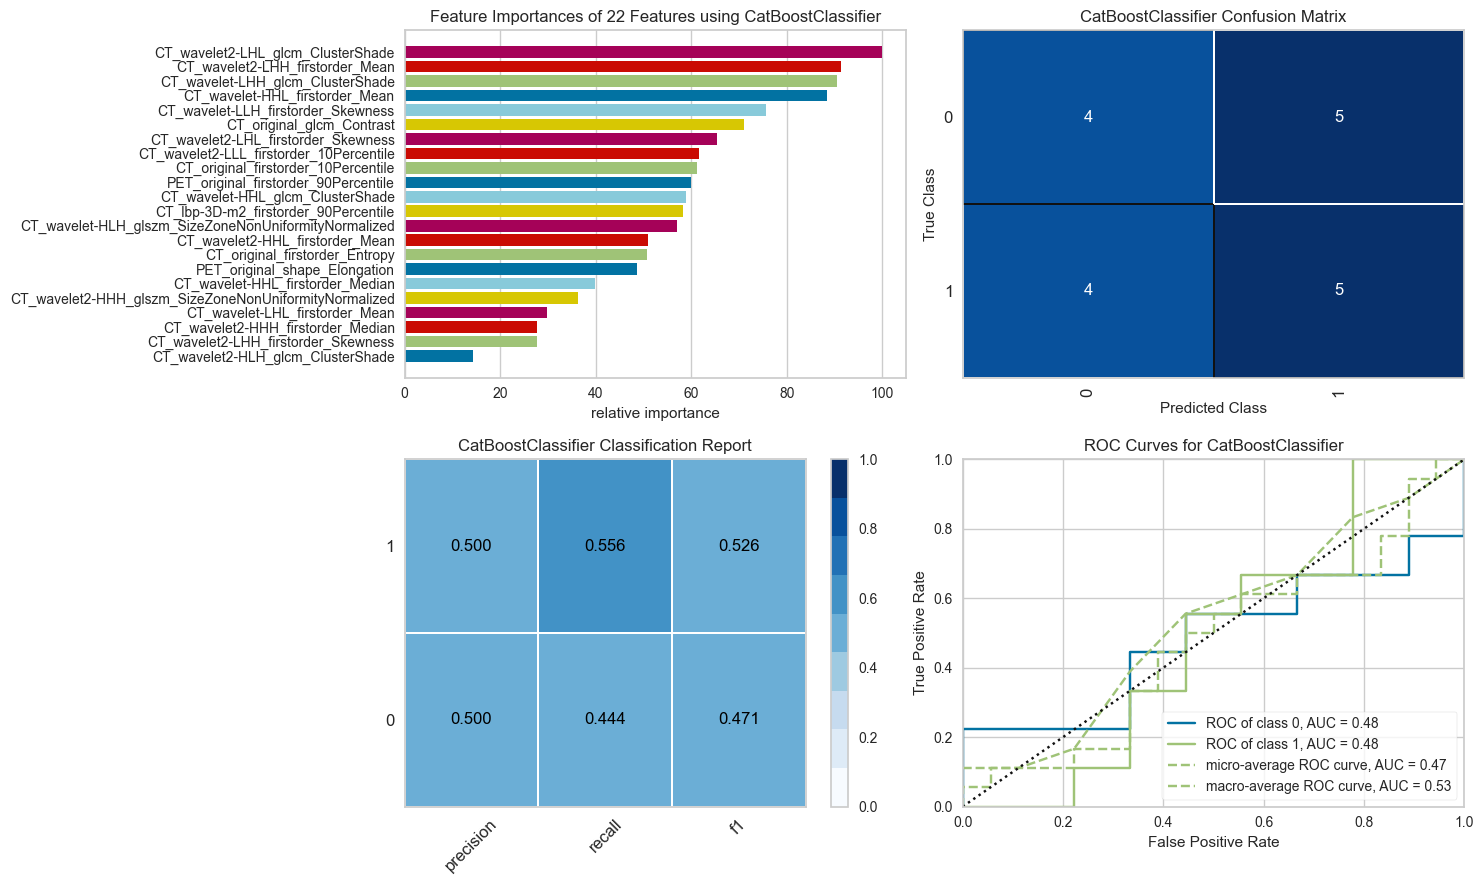

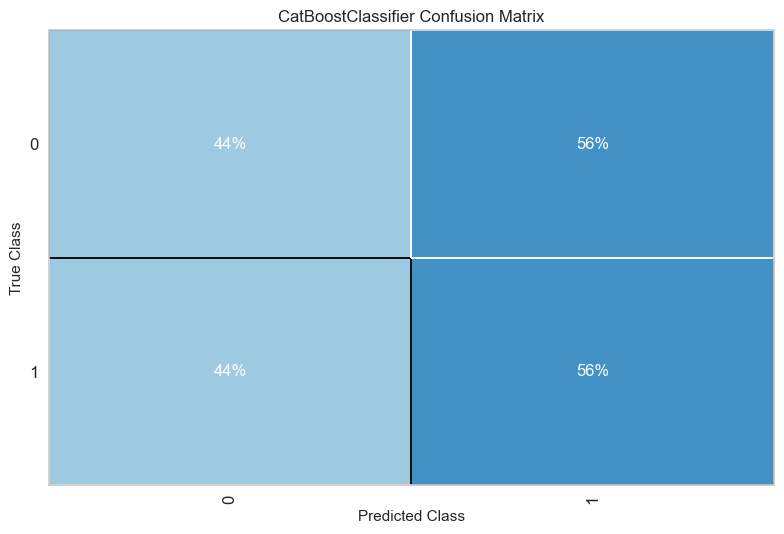

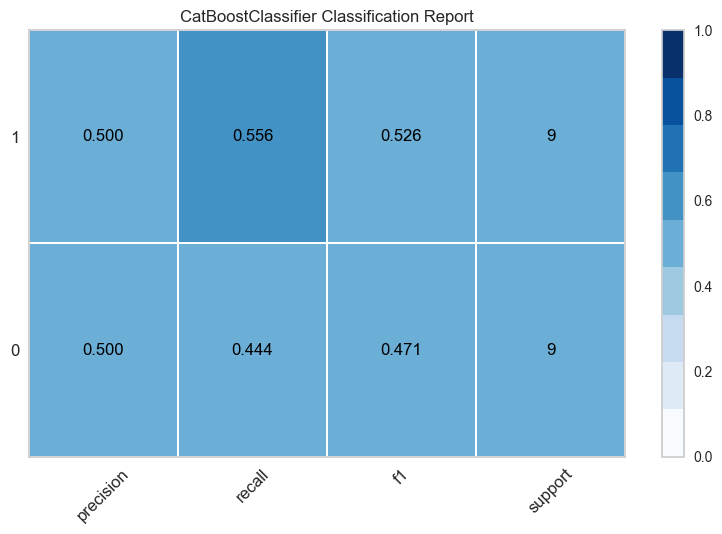

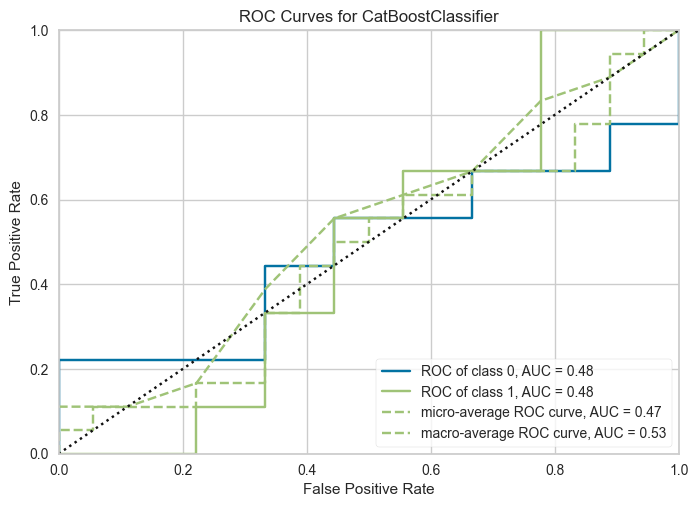

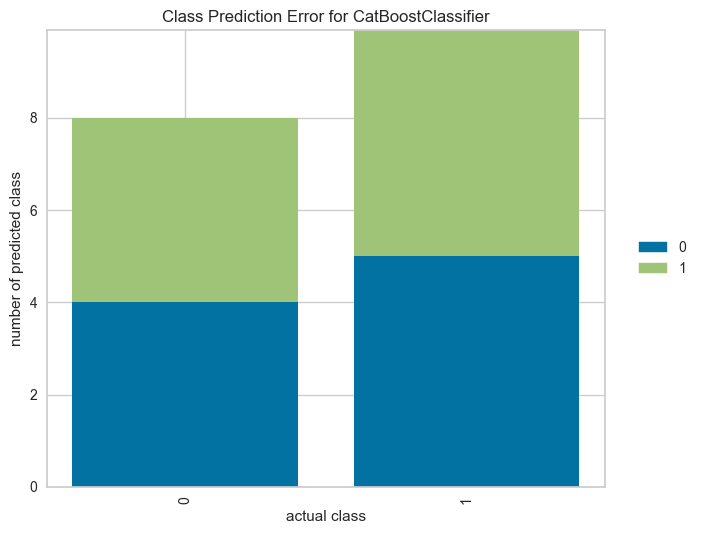

NameError: name 'X' is not defined

In [59]:
# Visualization of Results --> Feature Importances
cb_tuned1 = wrap(cb_tuned)
plot_feature_importances(cb_tuned1)
report_results_quickly(cb_tuned1)
plot_results(cb_tuned1)
plot_learning_curve(cb_tuned1)


In [60]:
# # AdaBoostClassifier # 0.883117

adb_model = AdaBoostClassifier()
adb_params = {"learning_rate": [0.001, 0.01,0.1, 0.2, 0.5],              
#               "subsample": [0.5, 0.9, 1.0],
              "n_estimators": [200,500,800,1000,2000,3000,5000]#,2000,3000,5000,10000
#               "max_features": [3,4,5],
#               "min_samples_split": [2, 5,7,8,9, 10,15,20, 30],
#               "max_depth": [1,2,3, None]
             } #,4, 5, 8

adb_cv_model = GridSearchCV(adb_model, adb_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
adb_cv_model.best_params_ # {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.9}

Fitting 10 folds for each of 35 candidates, totalling 350 fits


{'learning_rate': 0.1, 'n_estimators': 5000}

In [61]:
# Final Model
adb_tuned = AdaBoostClassifier(**adb_cv_model.best_params_).fit(X_train, y_train)
y_pred = adb_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766

0.4444444444444444

In [62]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca--RFFI-ADB73', Save_format = 'csv',Save_type = 'col')

In [63]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca--RFFI-ADB73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR E19", "EGFR E21"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.44      0.44      0.44         9
    EGFR E21       0.44      0.44      0.44         9

    accuracy                           0.44        18
   macro avg       0.44      0.44      0.44        18
weighted avg       0.44      0.44      0.44        18

precision 0.4444444444444444 accuracy 0.4444444444444444 recall 0.4444444444444444 auc 0.4444444444444444


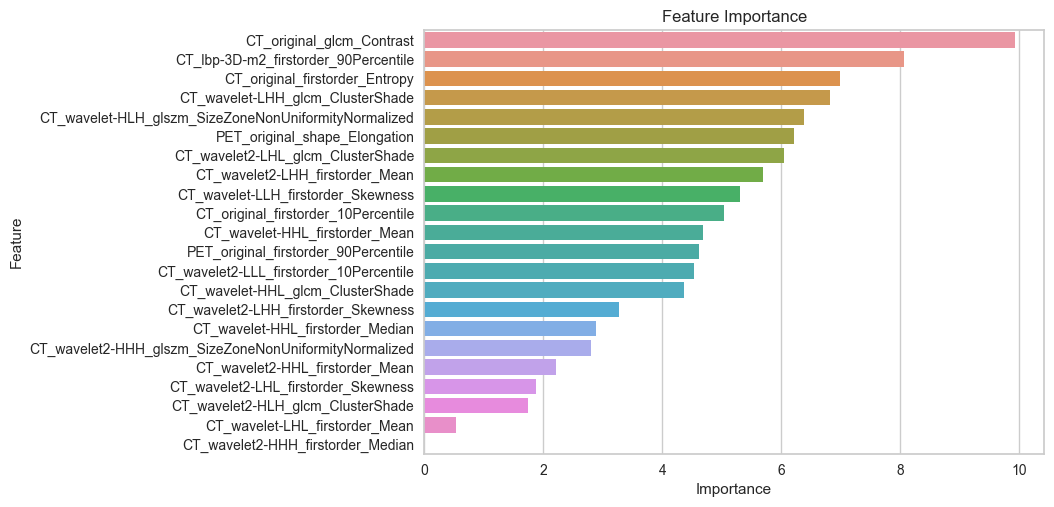

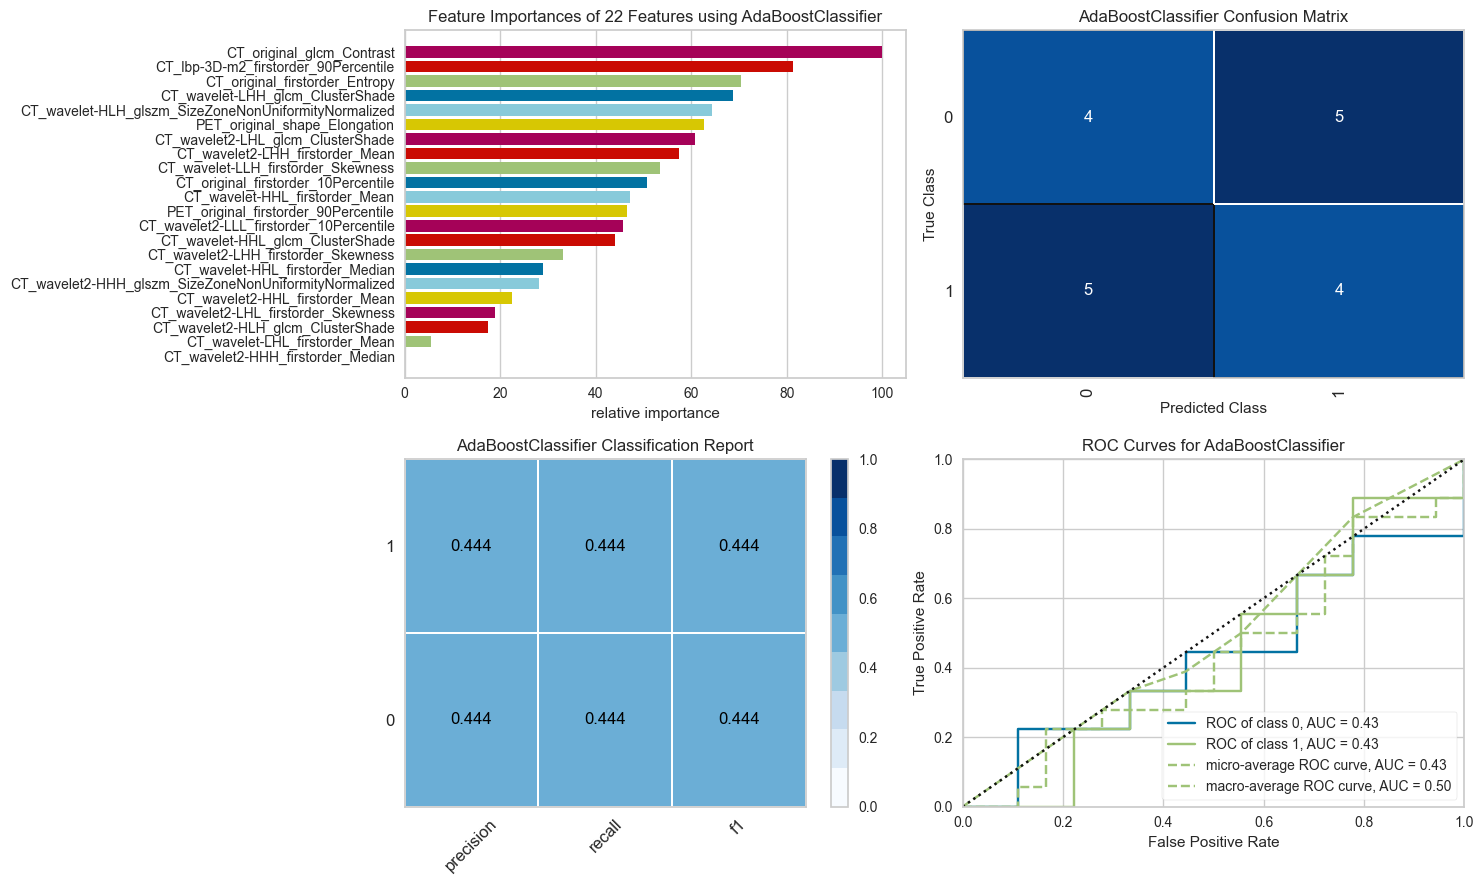

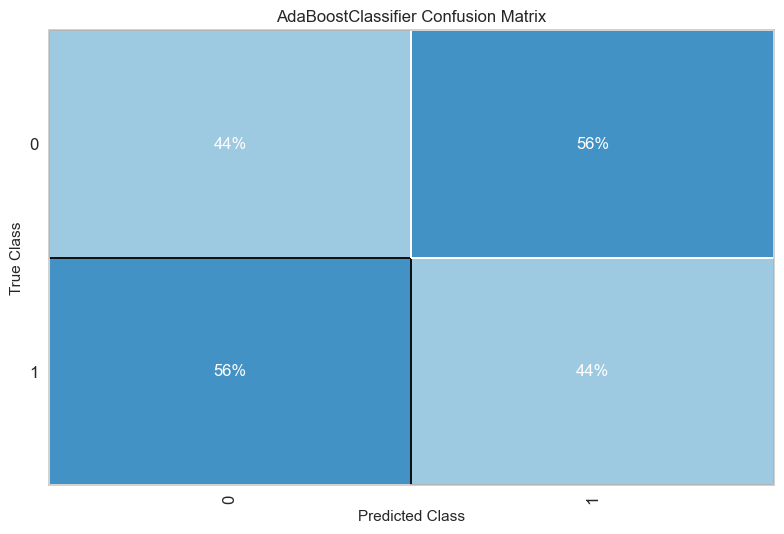

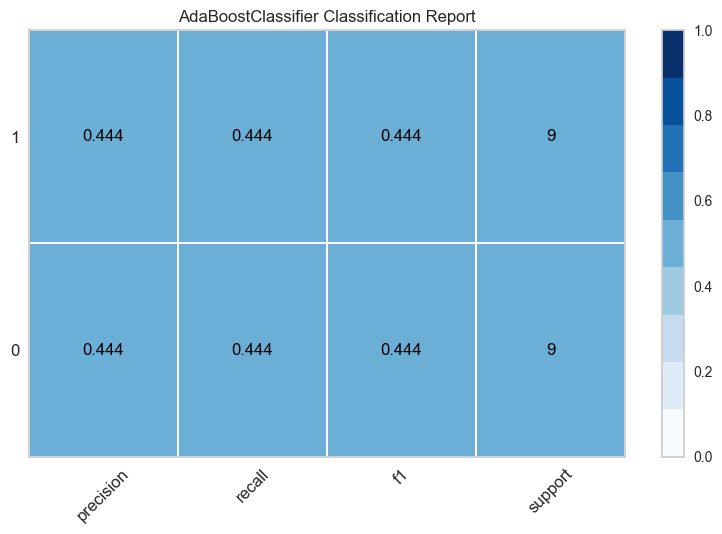

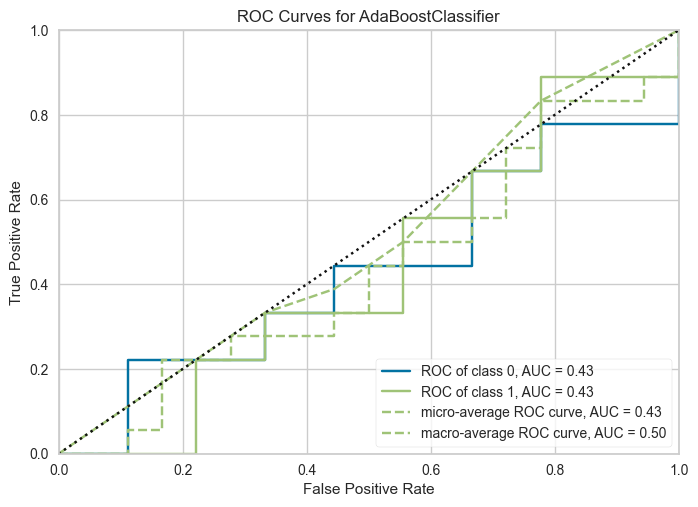

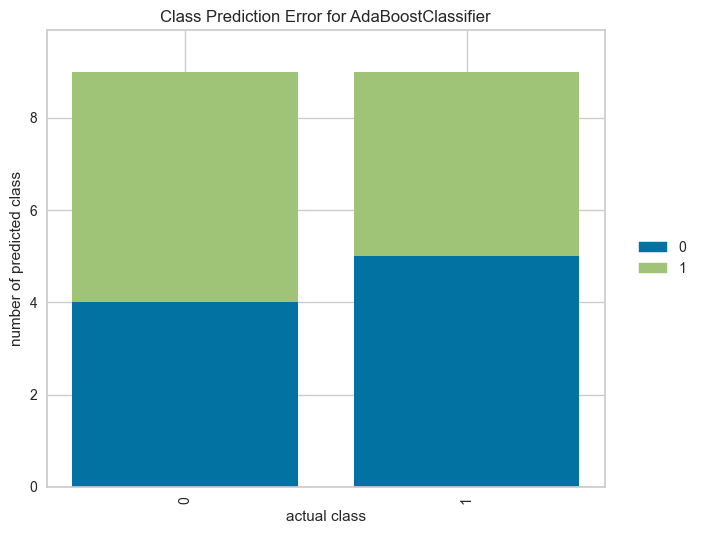

NameError: name 'X' is not defined

In [64]:
# # Visualization of Results --> Feature Importances
# # adb_tuned = wrap(adb_tuned)
plot_feature_importances(adb_tuned)
report_results_quickly(adb_tuned)
plot_results(adb_tuned)
plot_learning_curve(adb_tuned)

In [65]:
# # GradientBoostingClassifier # 0.883117

gbdt_model = GradientBoostingClassifier()
gbdt_params = {"learning_rate": [0.01, 0.1, 0.2, 0.5],              
              "subsample": [0.5, 0.6, 0.7,0.8],
              "n_estimators": [ 200,500,800,1000,2000,3000,5000]#
#               "max_features": [3,4,5],
#               "min_samples_split": [2, 5,7,8,9, 10,15,20, 30],
#               "max_depth": [1,2,3, None]
             } #,4, 5, 8

gbdt_cv_model = GridSearchCV(gbdt_model, gbdt_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
gbdt_cv_model.best_params_ # {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.9}

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


{'learning_rate': 0.01, 'n_estimators': 1000, 'subsample': 0.6}

In [66]:
# Final Model
gbdt_tuned = GradientBoostingClassifier(**gbdt_cv_model.best_params_).fit(X_train, y_train)
y_pred = gbdt_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766

0.5555555555555556

In [67]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca--RFFI-gbdt', Save_format = 'csv',Save_type = 'col')

In [68]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca--RFFI-gbdt.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR E19", "EGFR E21"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.57      0.44      0.50         9
    EGFR E21       0.55      0.67      0.60         9

    accuracy                           0.56        18
   macro avg       0.56      0.56      0.55        18
weighted avg       0.56      0.56      0.55        18

precision 0.5454545454545454 accuracy 0.5555555555555556 recall 0.6666666666666666 auc 0.5555555555555555


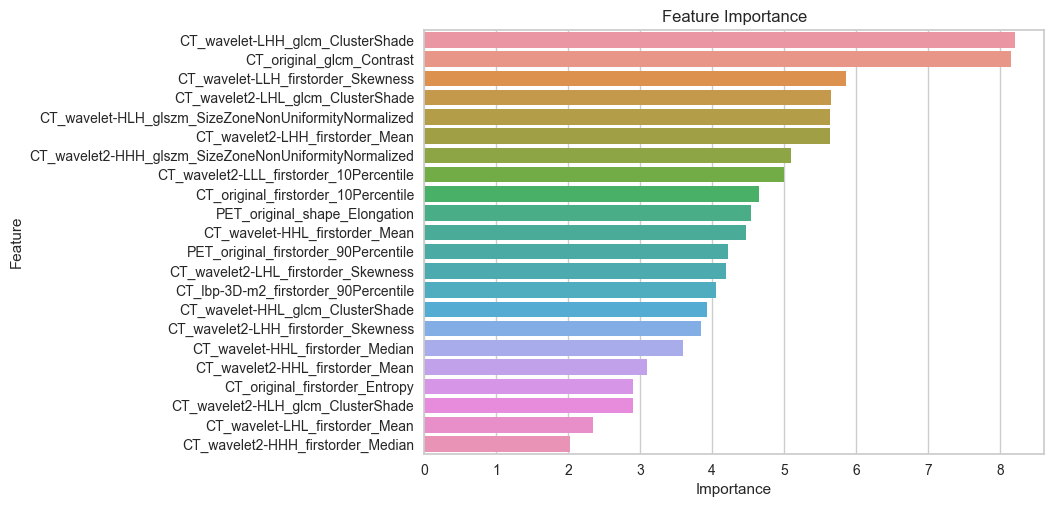

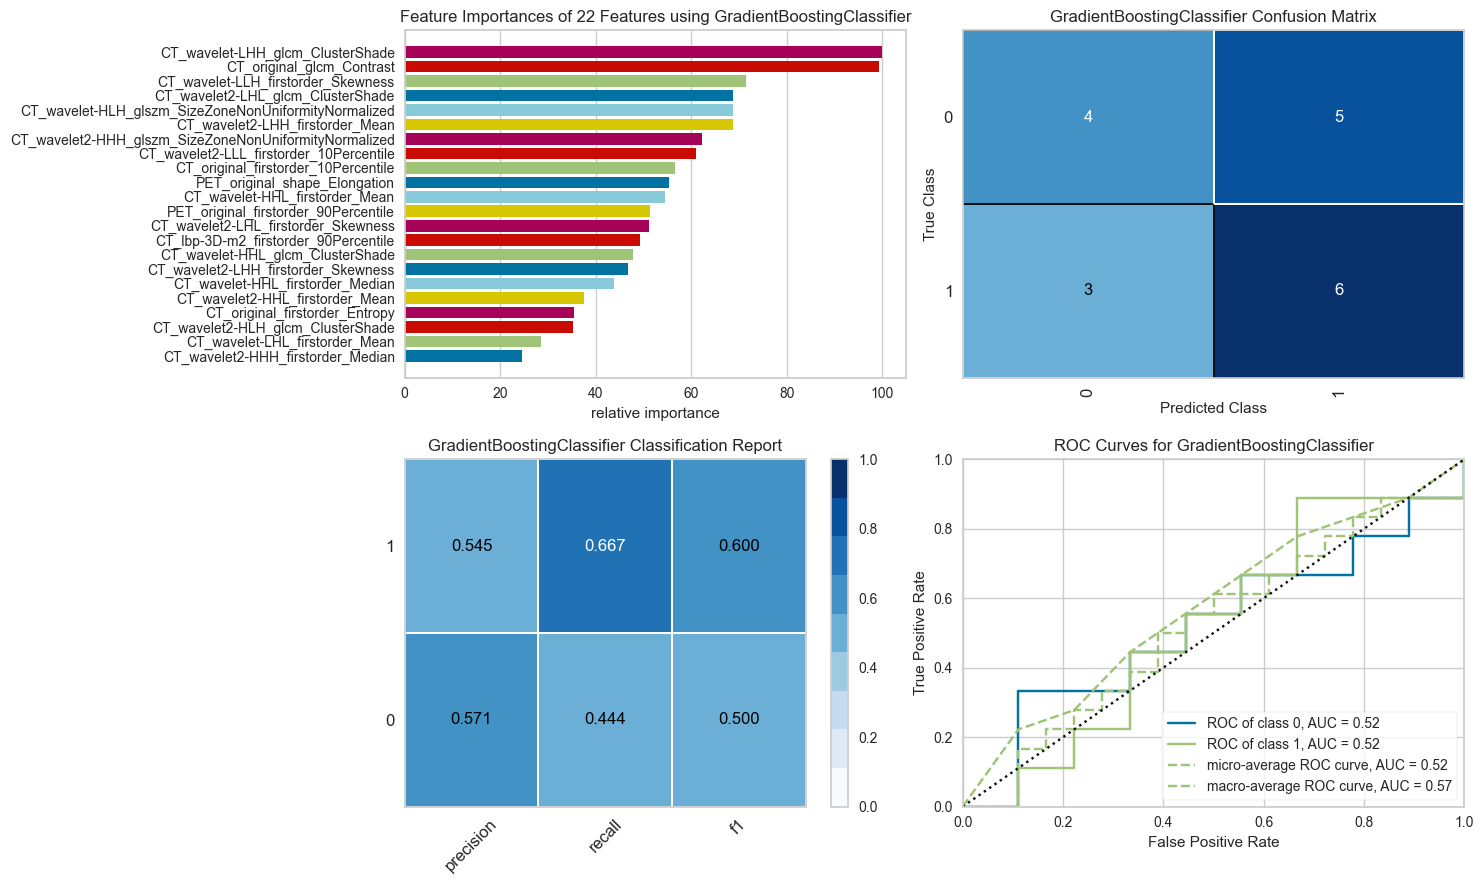

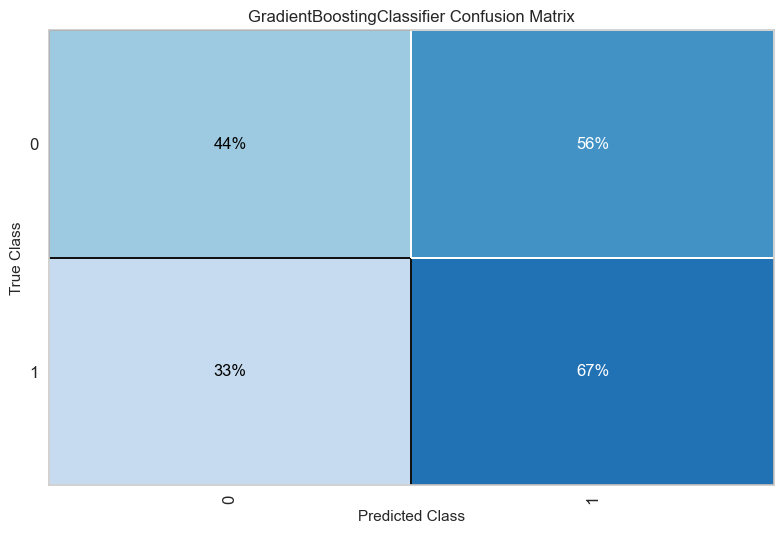

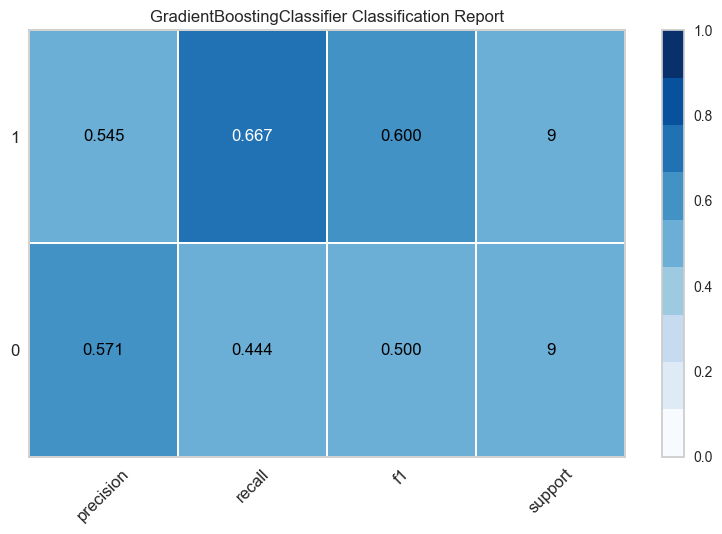

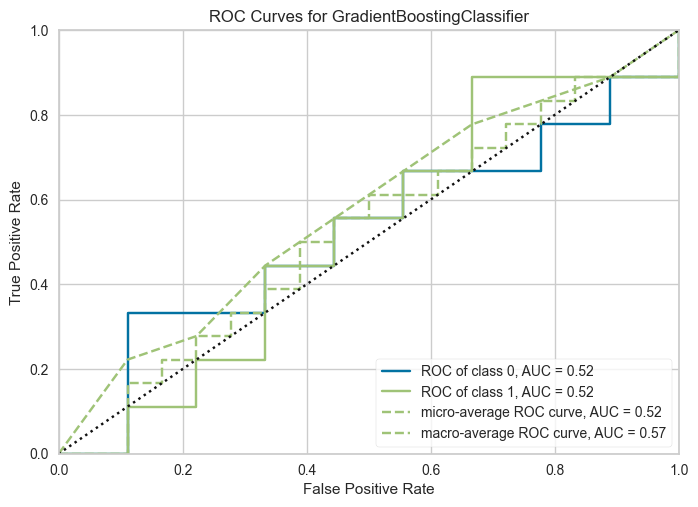

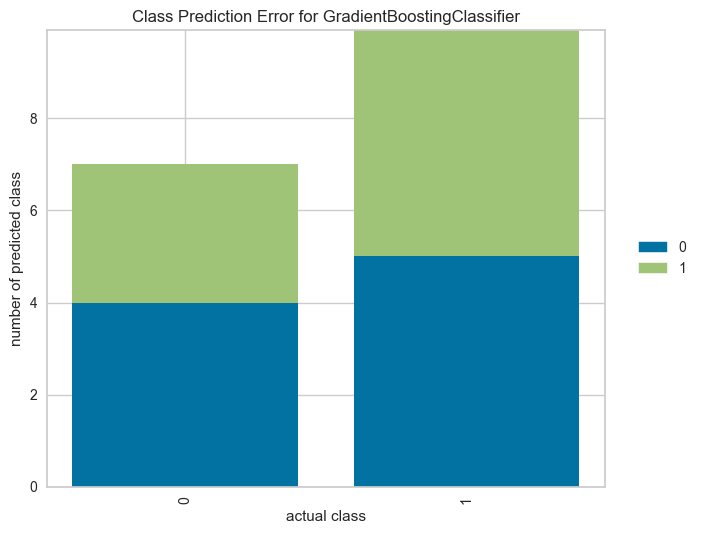

NameError: name 'X' is not defined

In [69]:
# # Visualization of Results --> Feature Importances
# # ngb_tuned = wrap(ngb_tuned)
plot_feature_importances(gbdt_tuned)

report_results_quickly(gbdt_tuned)
plot_results(gbdt_tuned)
plot_learning_curve(gbdt_tuned)

In [70]:
# XGBClassifier # 0.883117

xgb_model = XGBClassifier(random_state=42)
xgb_params = {"learning_rate": [0.01, 0.1, 0.2, 0.5],              
              "subsample": [0.5, 0.9, 1.0],
              "n_estimators": [ 500,1000,2000,3000,5000,10000],
#               "max_features": [3,4,5],
#               "min_samples_split": [2, 5,7,8,9, 10,15,20, 30],
              "max_depth": [1,2,3,4, 5, 8, None]}

xgb_cv_model = GridSearchCV(xgb_model, xgb_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
xgb_cv_model.best_params_ # {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 2000, 'subsample': 0.5}

Fitting 10 folds for each of 504 candidates, totalling 5040 fits


{'learning_rate': 0.01,
 'max_depth': 2,
 'n_estimators': 10000,
 'subsample': 0.9}

In [71]:
# Final Model
xgb_tuned = XGBClassifier(**xgb_cv_model.best_params_).fit(X_train, y_train)
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766


0.6111111111111112

In [72]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-RFFI-XGB73', Save_format = 'csv',Save_type = 'col')

In [73]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-RFFI-XGB73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR E19", "EGFR E21"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.62      0.56      0.59         9
    EGFR E21       0.60      0.67      0.63         9

    accuracy                           0.61        18
   macro avg       0.61      0.61      0.61        18
weighted avg       0.61      0.61      0.61        18

precision 0.6 accuracy 0.6111111111111112 recall 0.6666666666666666 auc 0.6111111111111112


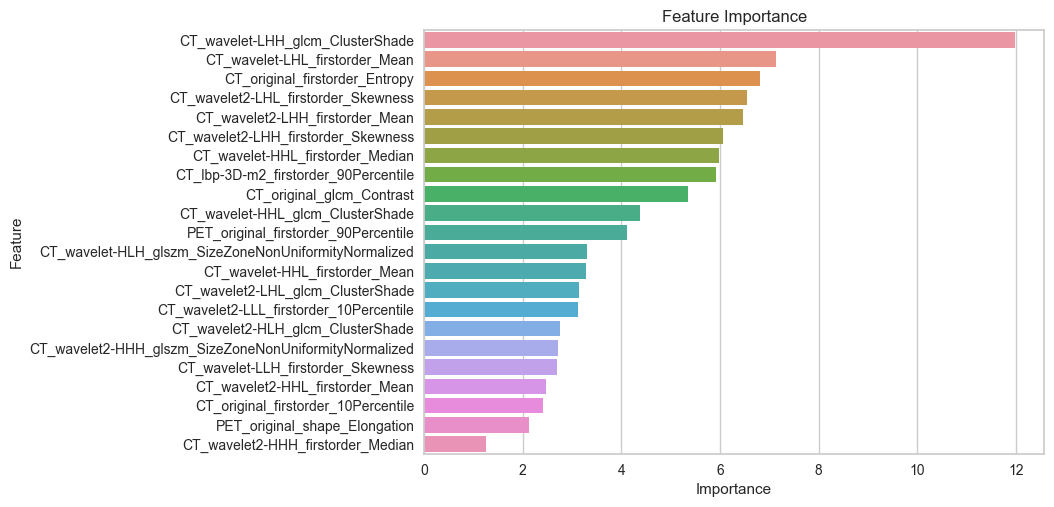

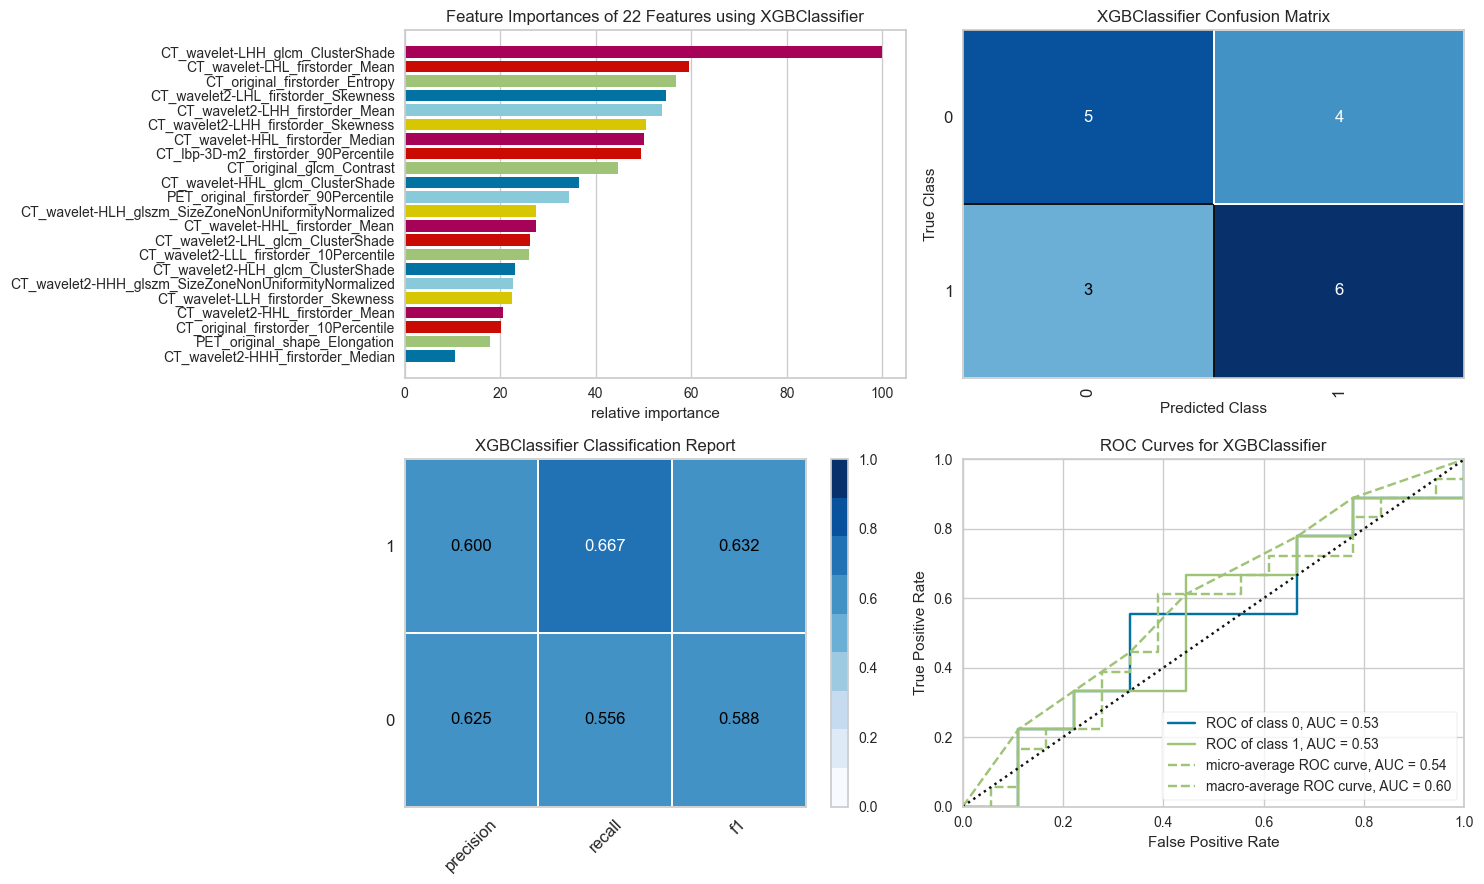

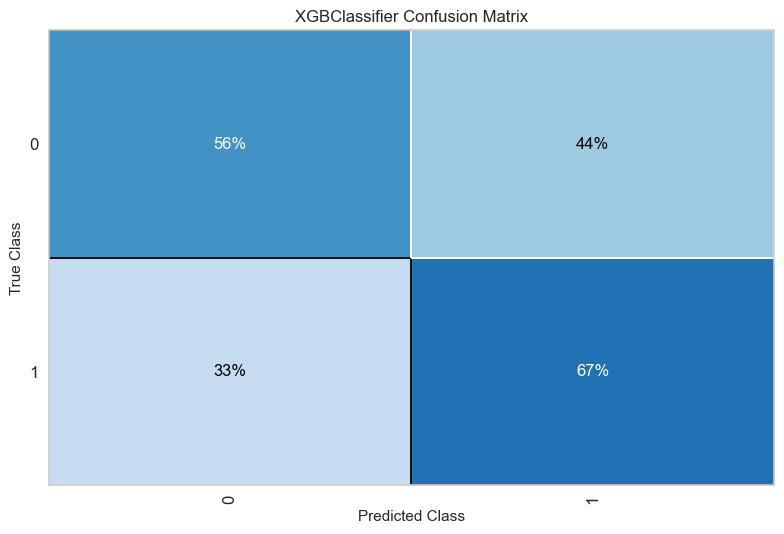

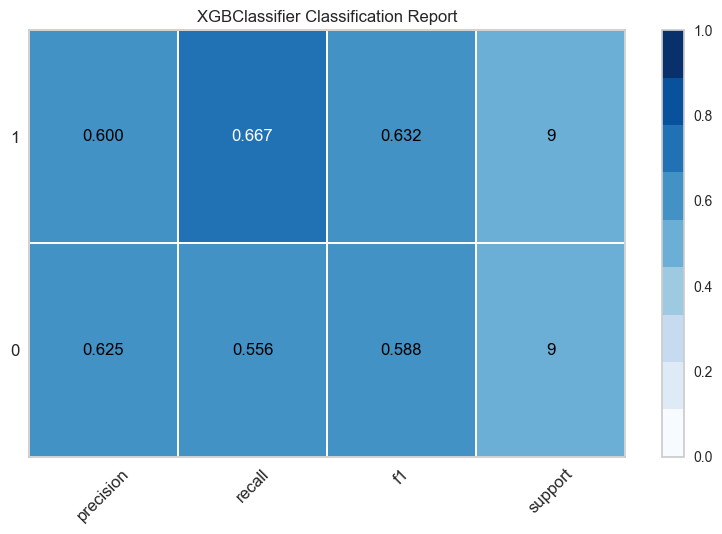

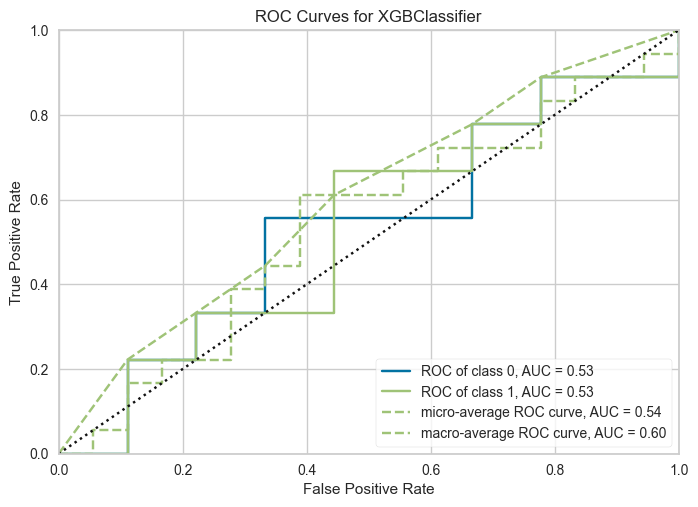

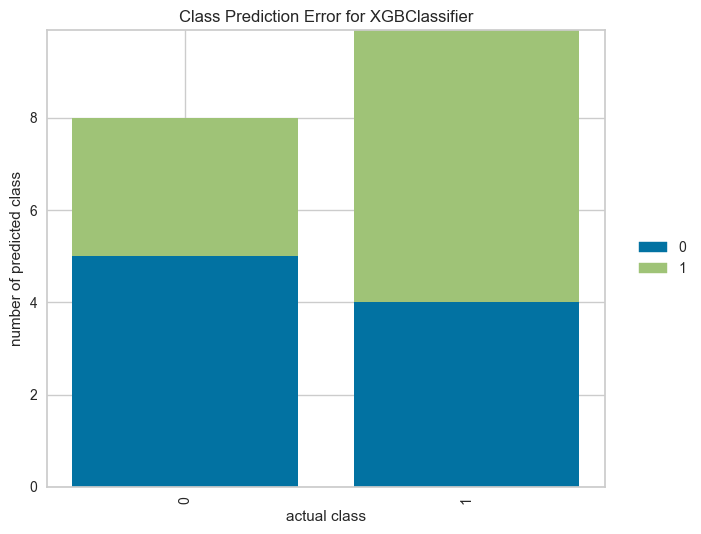

In [74]:
# Visualization of Results --> Feature Importances
plot_feature_importances(xgb_tuned)
report_results_quickly(xgb_tuned)
plot_results(xgb_tuned)
# plot_learning_curve(xgb_tuned)

In [75]:
# LightGBMClassifier # 0.857143

lgbm_model = LGBMClassifier(random_state=42)
lgbm_params = {"learning_rate": [0.01, 0.03, 0.05, 0.1, 0.2,0.5],
               "n_estimators": [200,500, 800,1000, 1500,2000,3000,5000],
               "max_depth": [1,2,3,4, 5,6, 8,None]}

lgbm_cv_model = GridSearchCV(lgbm_model, lgbm_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
lgbm_cv_model.best_params_ # {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 500}

Fitting 10 folds for each of 384 candidates, totalling 3840 fits


{'learning_rate': 0.2, 'max_depth': 1, 'n_estimators': 2000}

In [76]:
# Final Model
lgbm_tuned = LGBMClassifier(**lgbm_cv_model.best_params_).fit(X_train, y_train)
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766


0.5

In [77]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-RFFI-lgb73', Save_format = 'csv',Save_type = 'col')

In [78]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-RFFI-lgb73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR E19", "EGFR E21"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.50      0.33      0.40         9
    EGFR E21       0.50      0.67      0.57         9

    accuracy                           0.50        18
   macro avg       0.50      0.50      0.49        18
weighted avg       0.50      0.50      0.49        18

precision 0.5 accuracy 0.5 recall 0.6666666666666666 auc 0.5


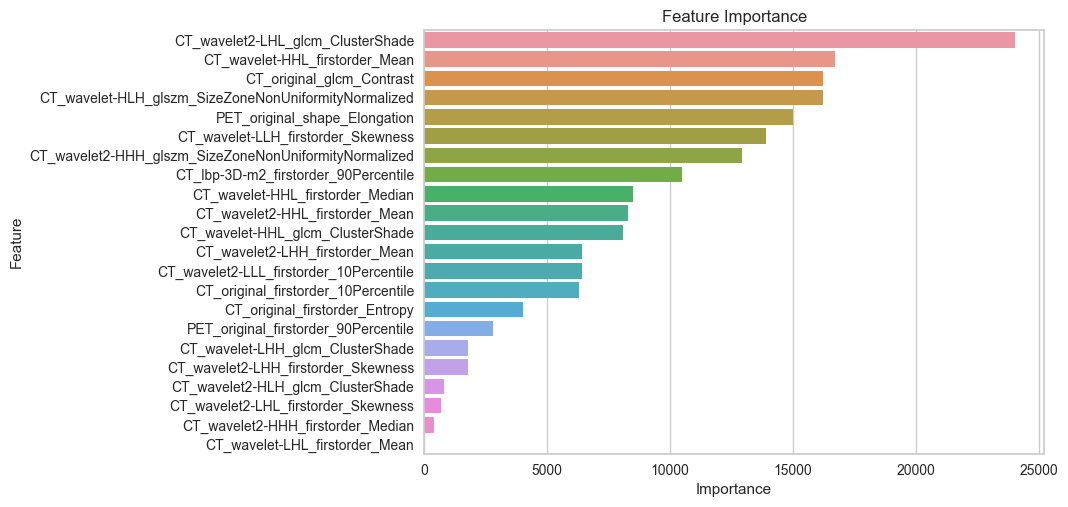

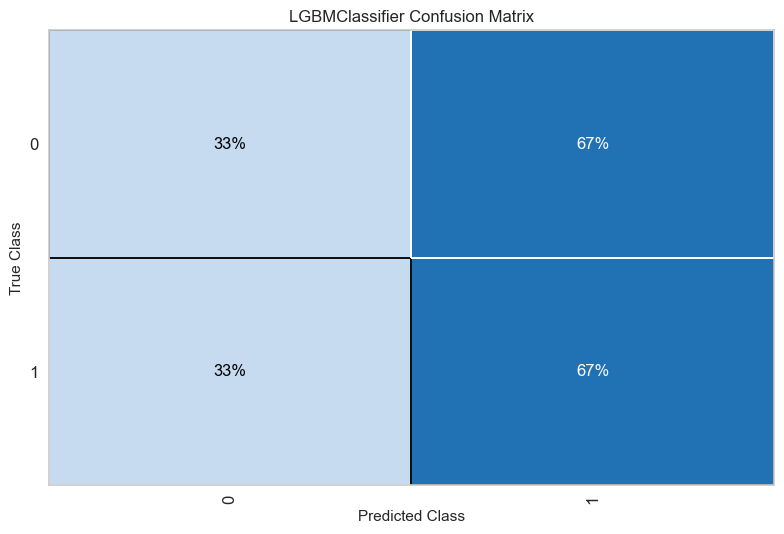

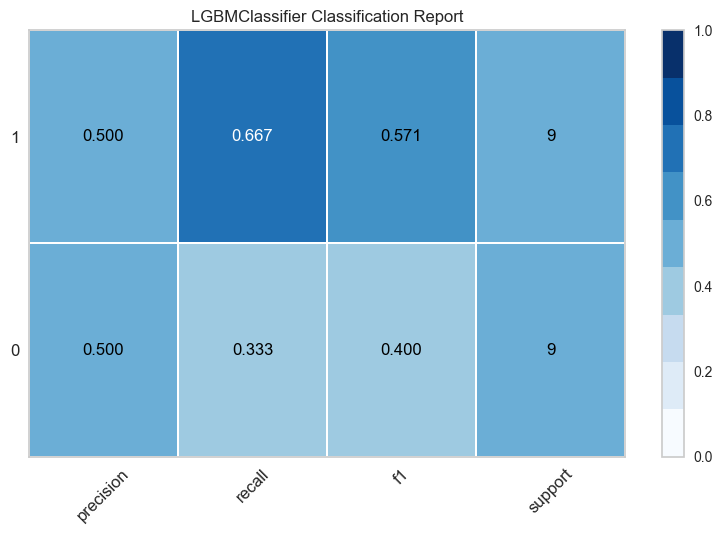

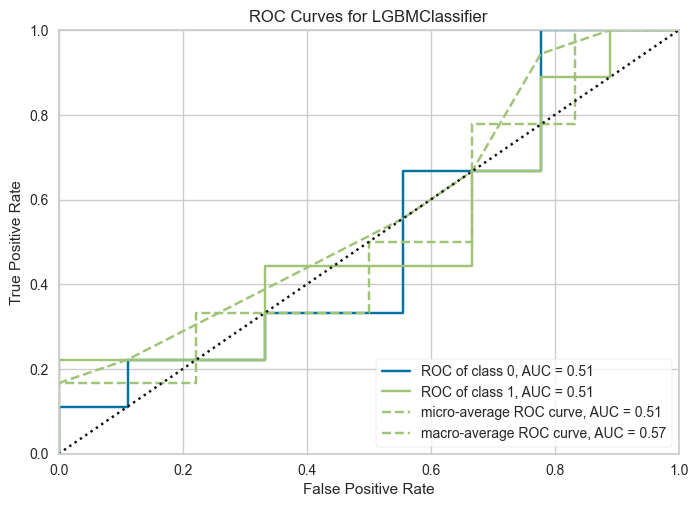

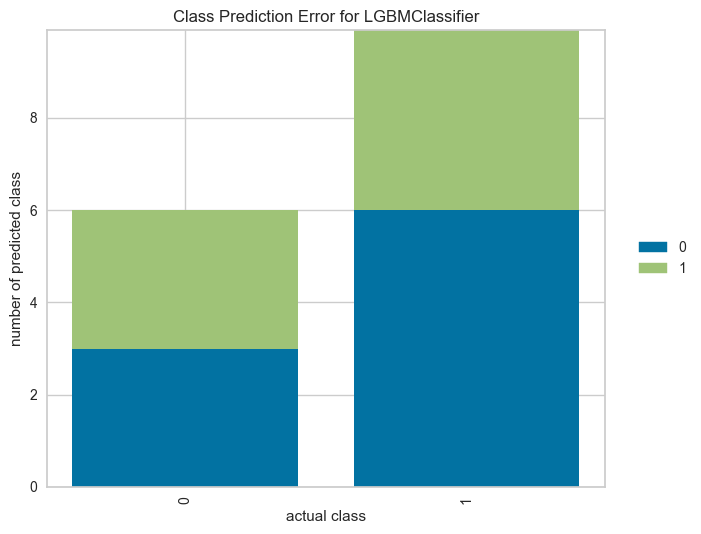

In [79]:
# Visualization of Results --> Feature Importances
plot_feature_importances(lgbm_tuned)
# report_results_quickly(lgbm_tuned)
plot_results(lgbm_tuned)
# plot_learning_curve(lgbm_tuned)

In [80]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(lgbm_tuned)
shap_values = explainer.shap_values(X_train)




In [81]:
# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

TypeError: list indices must be integers or slices, not tuple

In [82]:
shap.dependence_plot(y_train, shap_values, X_train)

TypeError: The passed shap_values are a list not an array! If you have a list of explanations try passing shap_values[0] instead to explain the first output class of a multi-output model.

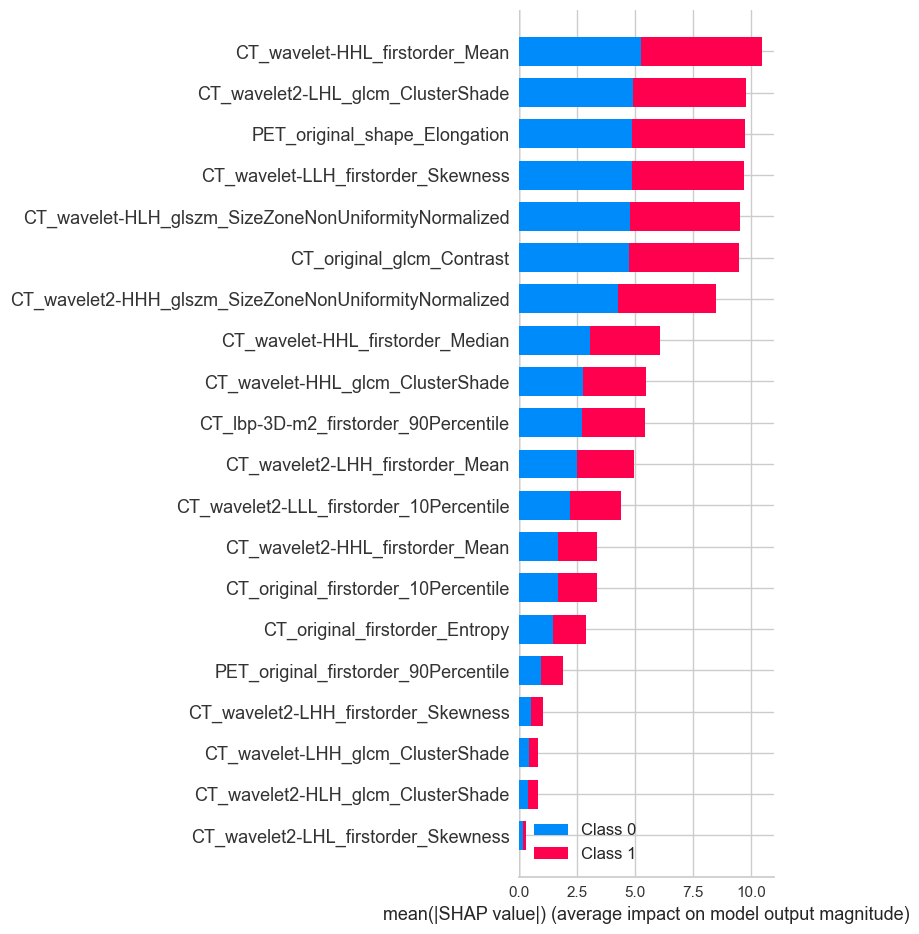

In [83]:
shap.summary_plot(shap_values, X_train)

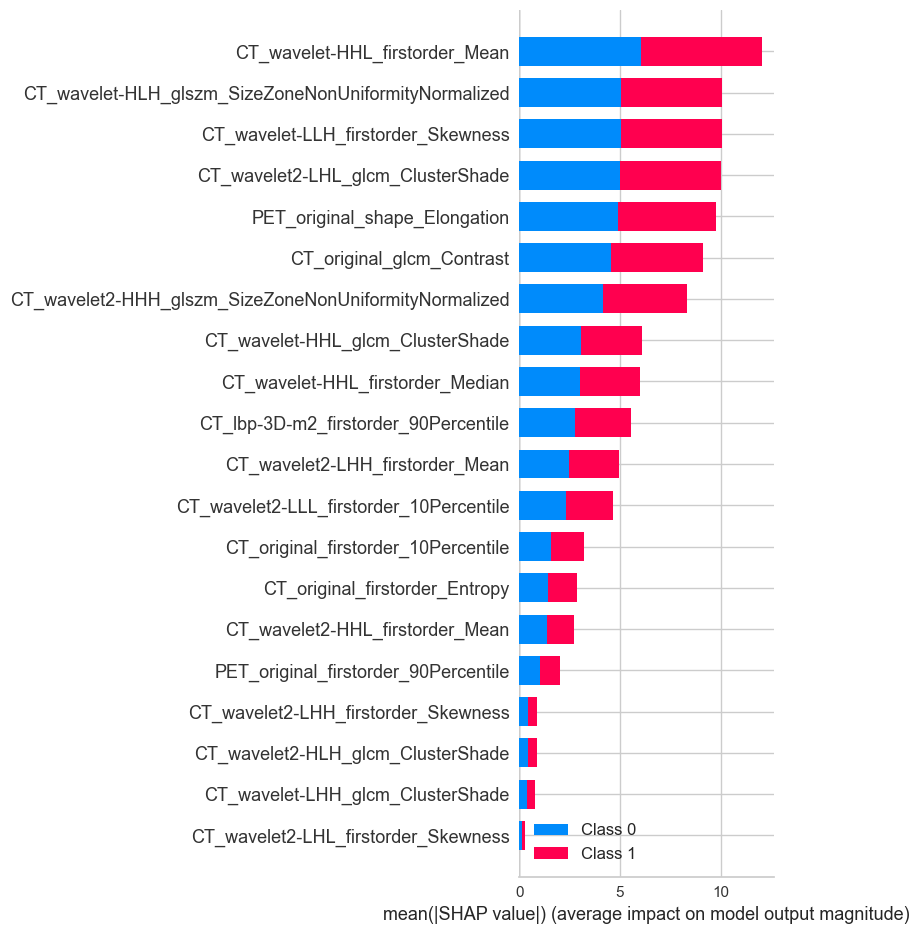

In [84]:
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [85]:
import shap
explainer = shap.TreeExplainer(lgbm_tuned)
shap_values = explainer.shap_values(X_test)


In [86]:
# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

TypeError: list indices must be integers or slices, not tuple

################ Accuracy scores for test set for the models: ################

LogisticRegression: 0.444444
RF: 0.500000
XGBoost: 0.611111
LightGBM: 0.500000
0:	learn: 0.6758079	total: 550us	remaining: 165ms
1:	learn: 0.6590663	total: 1.1ms	remaining: 164ms
2:	learn: 0.6464687	total: 1.55ms	remaining: 154ms
3:	learn: 0.6363821	total: 1.99ms	remaining: 147ms
4:	learn: 0.6267510	total: 2.4ms	remaining: 141ms
5:	learn: 0.6173990	total: 2.81ms	remaining: 138ms
6:	learn: 0.6039657	total: 3.21ms	remaining: 135ms
7:	learn: 0.5926899	total: 3.62ms	remaining: 132ms
8:	learn: 0.5818036	total: 4.04ms	remaining: 131ms
9:	learn: 0.5698009	total: 4.49ms	remaining: 130ms
10:	learn: 0.5638350	total: 4.9ms	remaining: 129ms
11:	learn: 0.5591757	total: 5.32ms	remaining: 128ms
12:	learn: 0.5555338	total: 5.72ms	remaining: 126ms
13:	learn: 0.5443391	total: 6.24ms	remaining: 128ms
14:	learn: 0.5270611	total: 6.79ms	remaining: 129ms
15:	learn: 0.5172092	total: 7.27ms	remaining: 129ms
16:	learn: 0.5115927	to

GBDT: 0.500000
AdaBoost: 0.444444

################ Train and test results for the model: ################

               models  accuracy_train  accuracy_test
0  LogisticRegression           0.914          0.444
1                  RF           1.000          0.500
2             XGBoost           1.000          0.611
3            LightGBM           1.000          0.500
4            CatBoost           1.000          0.500
5                GBDT           1.000          0.500
6            AdaBoost           1.000          0.444


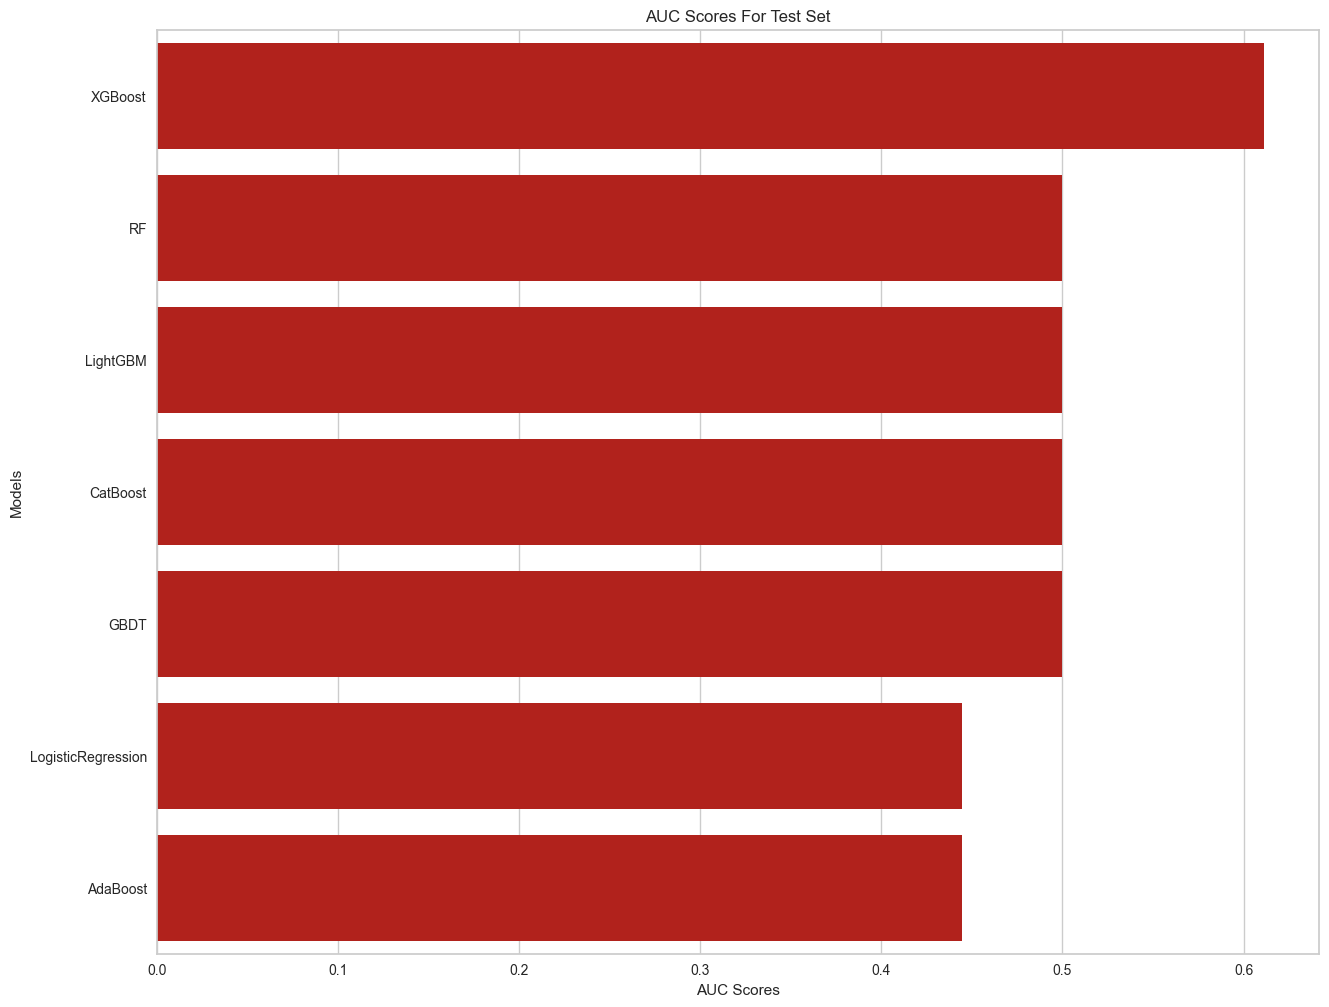

In [87]:
# Comparison of tuned models
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
tuned_models = [
    ('LogisticRegression', logreg_tuned),
                ('RF', rf_tuned),
                ('XGBoost', xgb_tuned),
                ('LightGBM', lgbm_tuned),
               ('CatBoost', cb_tuned),
#                 ('SVM', svm_tuned),
                ('GBDT', gbdt_tuned),
#                 ('NGBoost', ngb_tuned),
#                 ('DT', dt_tuned),
                ('AdaBoost', adb_tuned)
               ]


evaluate_classification_model_holdout(tuned_models)

In [45]:
# Stack models
from mlxtend.classifier import StackingCVClassifier
stack_gen = StackingCVClassifier(classifiers=(logreg_tuned, rf_tuned, xgb_tuned, lgbm_tuned,cb_tuned,svm_tuned,gbdt_tuned,ngb_tuned,dt_tuned,adb_tuned), meta_classifier=xgb_tuned)
stack_gen_model = stack_gen.fit(X_train, y_train)

evaluate_classification_model_holdout([('stack model', stack_gen_model)]) # 0.890


NameError: name 'xgb_tuned' is not defined

In [46]:
# Function ot blend models
def blend_models_predict(X_test):
    return ((0.05 * logreg_tuned.predict(X_test)) +
            (0.05 * dt_tuned.predict(X_test)) +
            (0.1 * gbdt_tuned.predict(X_test)) +
            (0.1 * rf_tuned.predict(X_test)) +
            (0.1 * svm_tuned.predict(X_test)) +
            (0.1 * adb_tuned.predict(X_test)) +
            (0.1 * xgb_tuned.predict(X_test)) +
            (0.1 * lgbm_tuned.predict(X_test)) +
            (0.1 * cb_tuned.predict(X_test)) +
             (0.1 * ngb_tuned.predict(X_test)) +
            (0.1 * stack_gen_model.predict(X_test)))

In [47]:
accuracy_score(y_test, blend_models_predict(X_test).round())# 0.8701298701298701
# aucroc_score(y_test, blend_models_predict(X_test).round())# 0.8701298701298701
roc_auc_score(y_test, blend_models_predict(X_test).round())

NameError: name 'dt_tuned' is not defined

In [48]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca--RFFI-stack73', Save_format = 'csv',Save_type = 'col')

In [88]:
# Pickle Models --> Saving tuned models

# Create a folder named 'Models'
# save working directory
#
# cur_dir = os.getcwd()
# cur_dir
#
# # change working directory:
os.chdir("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/2-testin-rj/split/RFE-RF-GB/RFFI")
#
# # Save the models
for model in tuned_models:
    pickle.dump(model[1], open(str(model[0]) + ".pkl", 'wb'))


In [89]:
import numpy as np
import pandas as pd
import pickle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [90]:
# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/testZscore-RFERF17-1.csv",index=None)
# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/testZscore-RFEGB8.csv",index=None)
# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/testZscore-RFERF17-42.csv",index=None)

PATHDATA1 = "C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/2-testin-rj/split/ExternalTest-FS-ZSCORE-MI-RFFI.csv"
external_test=pd.read_csv(PATHDATA1)
external_test_label = external_test.label
# print(external_test_label)
external_test=external_test.drop(columns=['label'])


In [91]:
OSPath = "C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/2-testin-rj/split"

In [92]:
######CatBoost  测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/RFFI/CatBoost.pkl'
finalpkl =  OSPath + pathpkl
cgb = pickle.load(open(finalpkl, 'rb'))
external_test_pred=cgb.predict(external_test)
path = '/RFE-RF-GB/ex-test-cgb-RFFI-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# cgb = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/CatBoost.pkl', 'rb'))

# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-cgb-RFERF19-73.csv', external_test_pred, delimiter = ',')

auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR E19", "EGFR E21"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)


              precision    recall  f1-score   support

    EGFR E19       0.50      0.54      0.52        26
    EGFR E21       0.29      0.26      0.28        19

    accuracy                           0.42        45
   macro avg       0.40      0.40      0.40        45
weighted avg       0.41      0.42      0.42        45

precision 0.29411764705882354 accuracy 0.4222222222222222 recall 0.2631578947368421 auc 0.4008097165991903


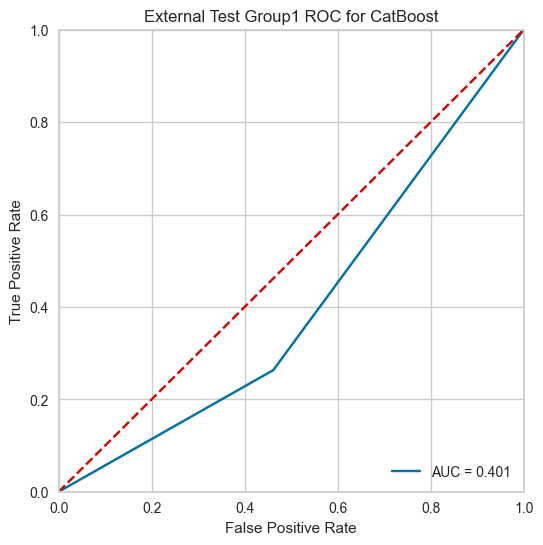

In [93]:
######CatBoost  测试集1
#############画图部分
# from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
import pylab as plt
import warnings;warnings.filterwarnings('ignore')
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for CatBoost')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [94]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[14 12]
 [14  5]]
Normalized confusion matrix
[[0.54 0.46]
 [0.74 0.26]]


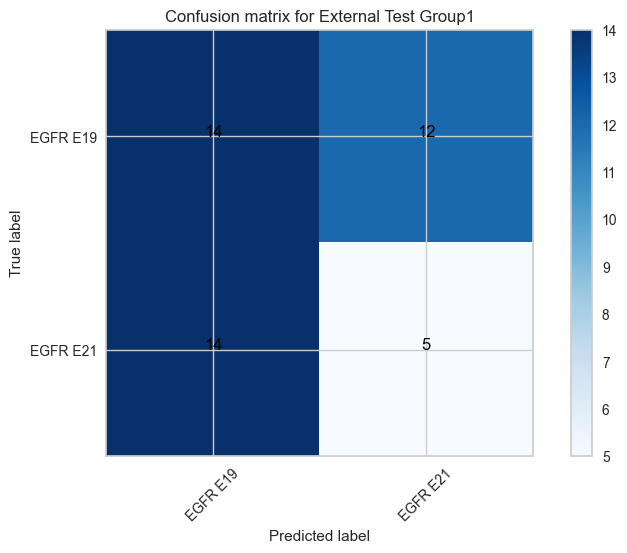

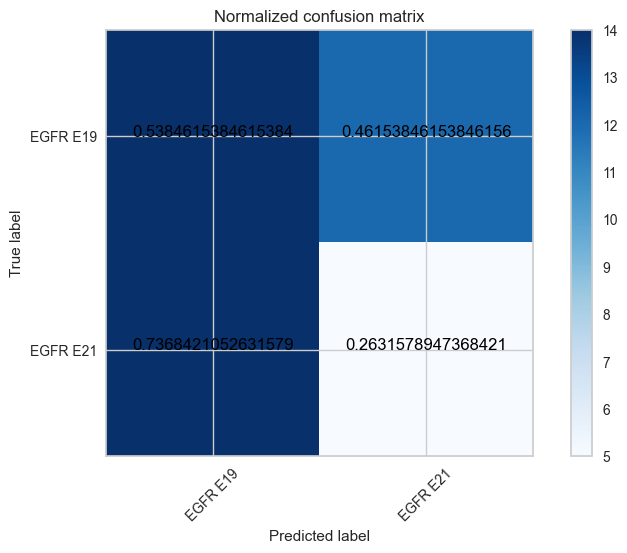

In [95]:
######CatBoost  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [96]:
######adaboost  测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/RFFI/AdaBoost.pkl'
finalpkl =  OSPath + pathpkl
adb = pickle.load(open(finalpkl, 'rb'))
external_test_pred=adb.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-adb-RFFI-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')


# adb = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/AdaBoost.pkl', 'rb'))
# external_test_pred=adb.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-adb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR E19", "EGFR E21"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)


              precision    recall  f1-score   support

    EGFR E19       0.52      0.54      0.53        26
    EGFR E21       0.33      0.32      0.32        19

    accuracy                           0.44        45
   macro avg       0.43      0.43      0.43        45
weighted avg       0.44      0.44      0.44        45

precision 0.3333333333333333 accuracy 0.4444444444444444 recall 0.3157894736842105 auc 0.4271255060728745


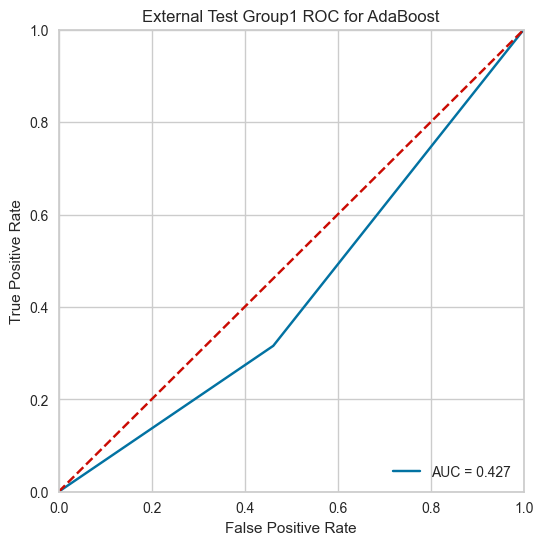

In [97]:
######adaboost  测试集1
#############画图部分
# from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
import pylab as plt
import warnings;warnings.filterwarnings('ignore')
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for AdaBoost')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [98]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[14 12]
 [13  6]]
Normalized confusion matrix
[[0.54 0.46]
 [0.68 0.32]]


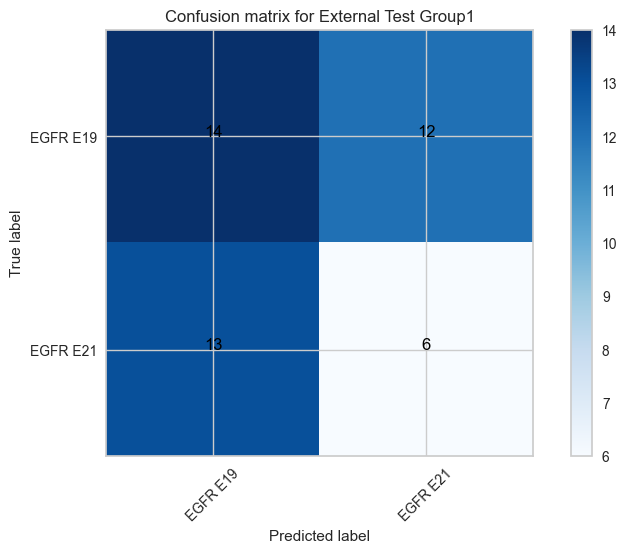

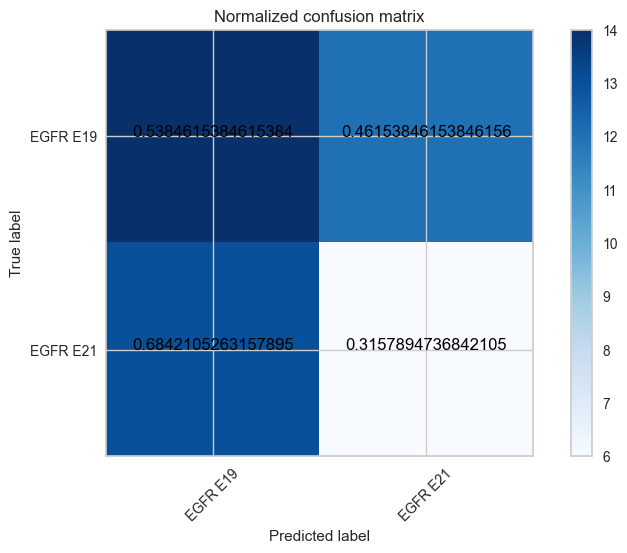

In [99]:
######adaboost  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [100]:
######XGB  测试集1
import numpy as np
import pickle
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances

# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/RFFI/XGBoost.pkl'
finalpkl =  OSPath + pathpkl
xgb = pickle.load(open(finalpkl, 'rb'))
external_test_pred=xgb.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-xgb-RFFI-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')


# xgb = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/XGBoost.pkl', 'rb'))
# external_test_pred=xgb.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-xgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='macro', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="macro", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR E19", "EGFR E21"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)
# precision 0.625 accuracy 0.6349206349206349 recall 0.7575757575757576 auc 0.6287878787878788
# precision    recall  f1-score   support

#     EGFR_E19       0.65      0.50      0.57        30
#     EGFR_E21       0.62      0.76      0.68        33

#     accuracy                           0.63        63
#    macro avg       0.64      0.63      0.63        63
# weighted avg       0.64      0.63      0.63        63


              precision    recall  f1-score   support

    EGFR E19       0.52      0.54      0.53        26
    EGFR E21       0.33      0.32      0.32        19

    accuracy                           0.44        45
   macro avg       0.43      0.43      0.43        45
weighted avg       0.44      0.44      0.44        45

precision 0.42592592592592593 accuracy 0.4444444444444444 recall 0.4271255060728745 auc 0.4271255060728745


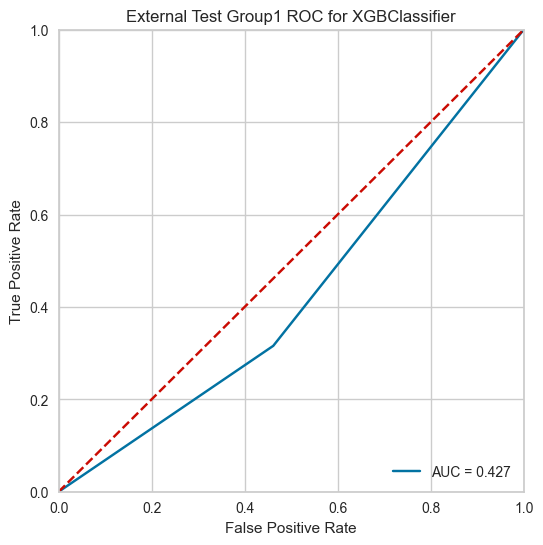

In [101]:
######XGB  测试集1
#############画图部分
# from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
import pylab as plt
import warnings;warnings.filterwarnings('ignore')
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for XGBClassifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [102]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[14 12]
 [13  6]]
Normalized confusion matrix
[[0.54 0.46]
 [0.68 0.32]]


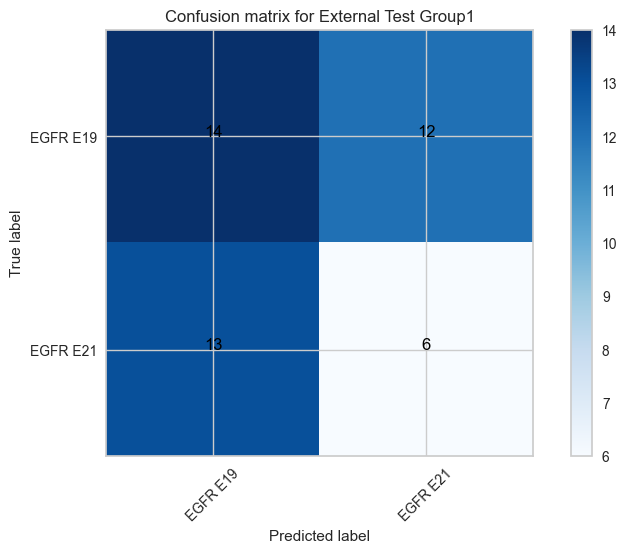

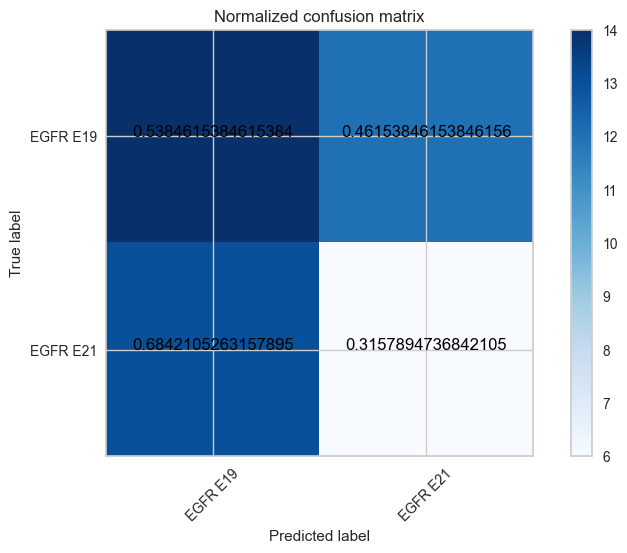

In [103]:
######XGB  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [104]:
#####RF  测试集1
import numpy as np
# # Load the model that we saved before
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/RFFI/RF.pkl'
finalpkl =  OSPath + pathpkl
rft = pickle.load(open(finalpkl, 'rb'))
external_test_pred=rft.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-RF-RFFI-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# rft = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/RF.pkl', 'rb'))
# external_test_pred=rft.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-RF-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR E19", "EGFR E21"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.53      0.65      0.59        26
    EGFR E21       0.31      0.21      0.25        19

    accuracy                           0.47        45
   macro avg       0.42      0.43      0.42        45
weighted avg       0.44      0.47      0.44        45

precision 0.3076923076923077 accuracy 0.4666666666666667 recall 0.21052631578947367 auc 0.43218623481781376


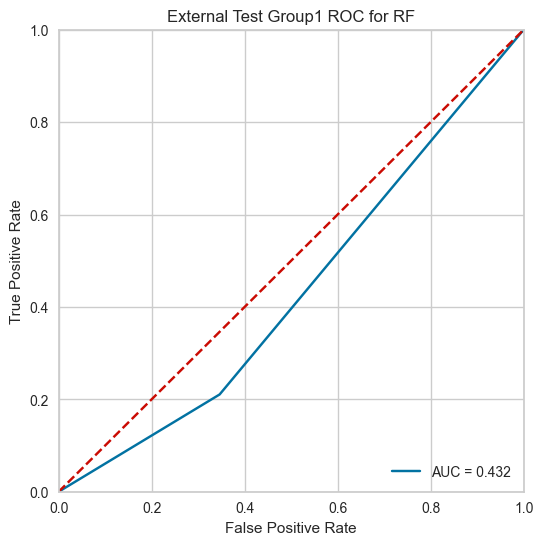

In [105]:
#####RF  测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[17  9]
 [15  4]]
Normalized confusion matrix
[[0.65 0.35]
 [0.79 0.21]]


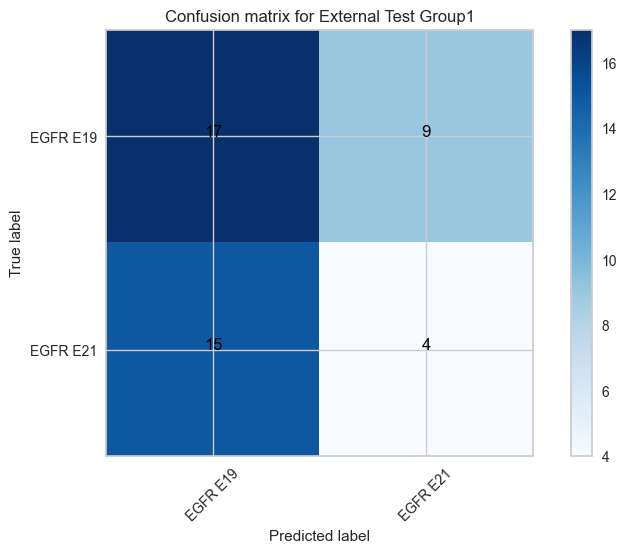

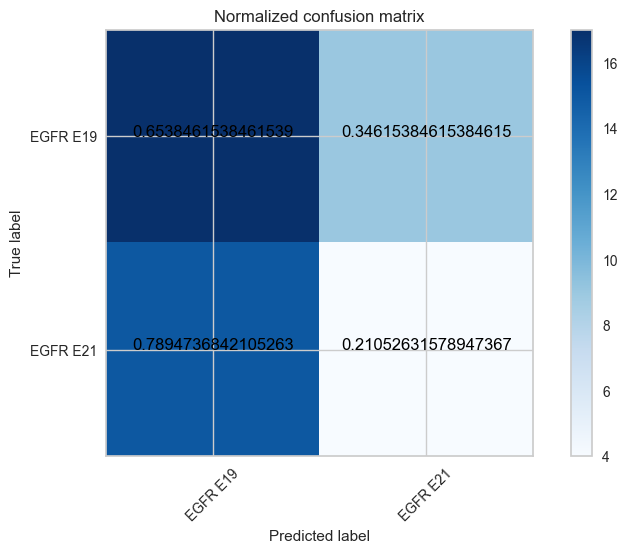

In [106]:
#####RF  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [107]:
######LR 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/RFFI/LogisticRegression.pkl'
finalpkl =  OSPath + pathpkl
lrt = pickle.load(open(finalpkl, 'rb'))
external_test_pred=lrt.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-lr-RFFI-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# lrt = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LogisticRegression.pkl', 'rb'))
# external_test_pred=lrt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lr-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR E19", "EGFR E21"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)


              precision    recall  f1-score   support

    EGFR E19       0.43      0.38      0.41        26
    EGFR E21       0.27      0.32      0.29        19

    accuracy                           0.36        45
   macro avg       0.35      0.35      0.35        45
weighted avg       0.37      0.36      0.36        45

precision 0.2727272727272727 accuracy 0.35555555555555557 recall 0.3157894736842105 auc 0.3502024291497976


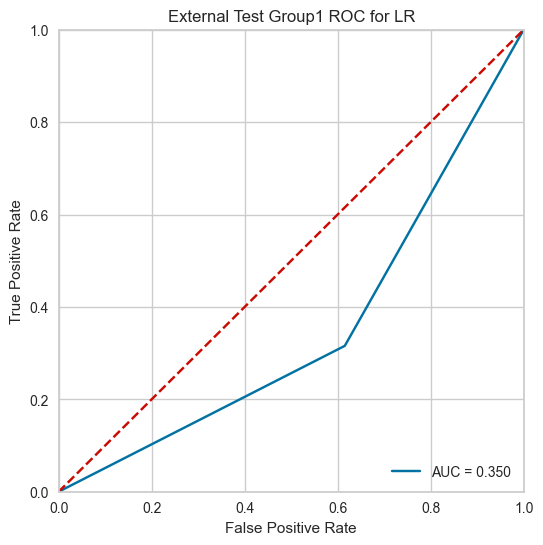

In [108]:
######LR 测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for LR')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[10 16]
 [13  6]]
Normalized confusion matrix
[[0.38 0.62]
 [0.68 0.32]]


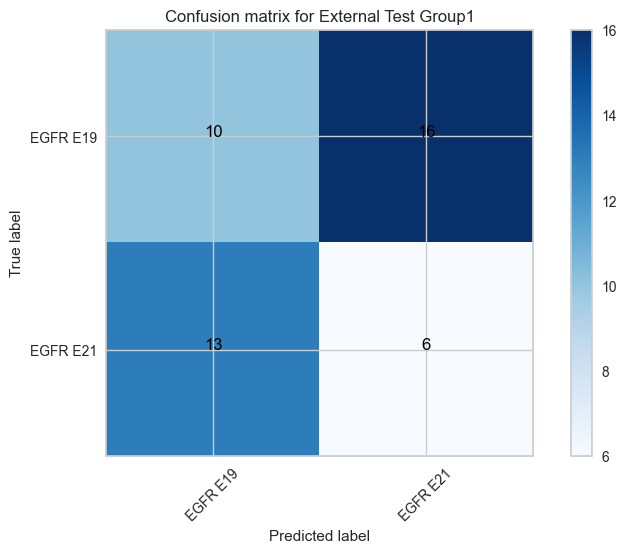

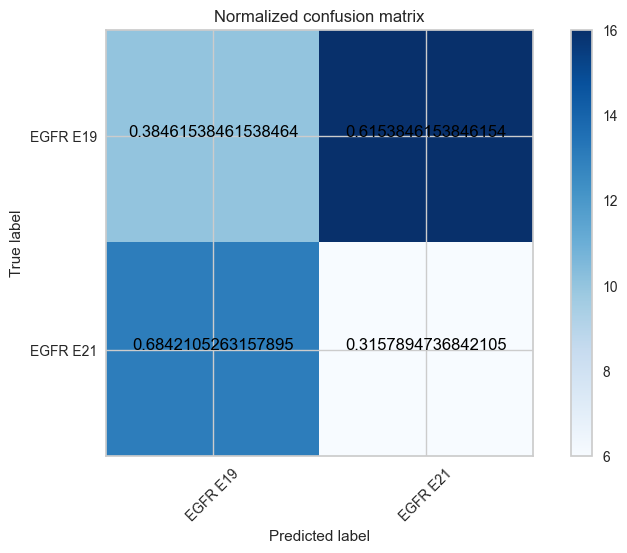

In [109]:
#####LR  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [110]:
##GBDT 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/RFFI/GBDT.pkl'
finalpkl =  OSPath + pathpkl
GBDT = pickle.load(open(finalpkl, 'rb'))
external_test_pred=GBDT.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-GBDT-RFFI-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# svm = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LightGBM.pkl', 'rb'))
# external_test_pred=lgbt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR E19", "EGFR E21"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.56      0.58      0.57        26
    EGFR E21       0.39      0.37      0.38        19

    accuracy                           0.49        45
   macro avg       0.47      0.47      0.47        45
weighted avg       0.49      0.49      0.49        45

precision 0.3888888888888889 accuracy 0.4888888888888889 recall 0.3684210526315789 auc 0.47267206477732787


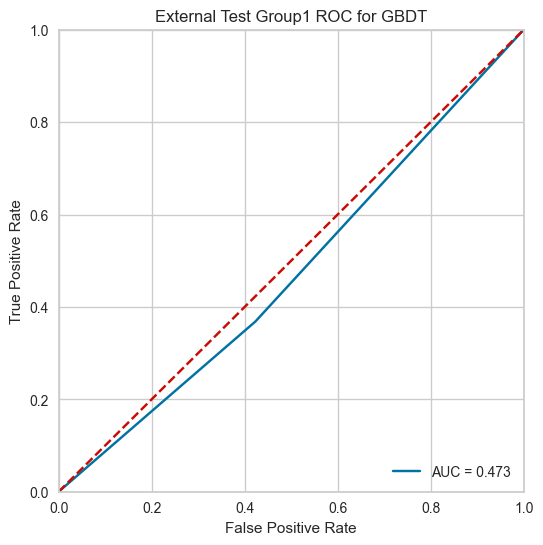

In [111]:
##GBDT 测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for GBDT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[15 11]
 [12  7]]
Normalized confusion matrix
[[0.58 0.42]
 [0.63 0.37]]


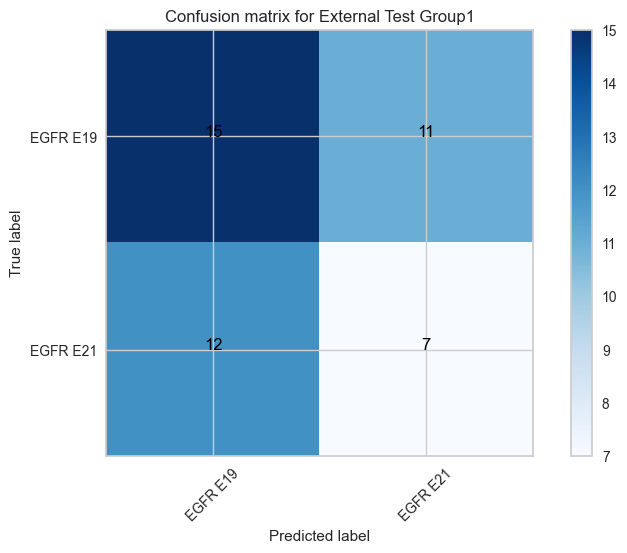

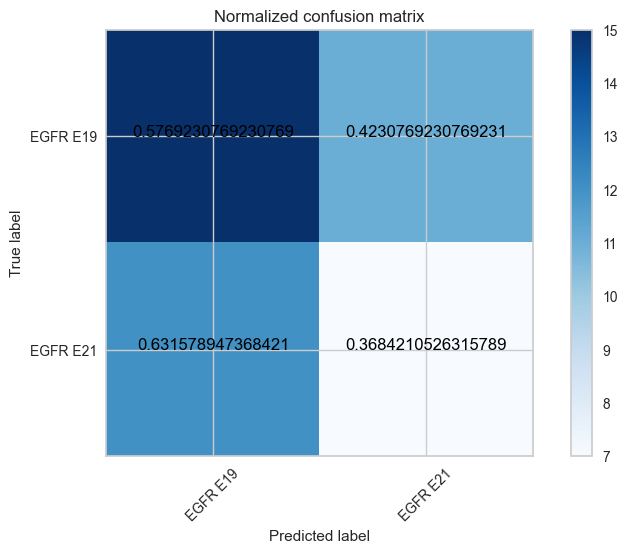

In [112]:
##GBDT 测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [113]:
##lgb 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/RFFI/LightGBM.pkl'
finalpkl =  OSPath + pathpkl
lgbt = pickle.load(open(finalpkl, 'rb'))
external_test_pred=lgbt.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-lgb-RFFI-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# lgbt = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LightGBM.pkl', 'rb'))
# external_test_pred=lgbt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR E19", "EGFR E21"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.50      0.58      0.54        26
    EGFR E21       0.27      0.21      0.24        19

    accuracy                           0.42        45
   macro avg       0.38      0.39      0.39        45
weighted avg       0.40      0.42      0.41        45

precision 0.26666666666666666 accuracy 0.4222222222222222 recall 0.21052631578947367 auc 0.39372469635627527


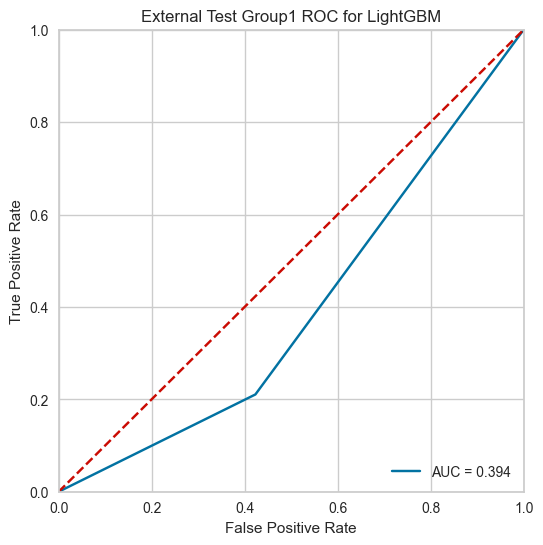

In [114]:
##lgb 测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for LightGBM')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[15 11]
 [15  4]]
Normalized confusion matrix
[[0.58 0.42]
 [0.79 0.21]]


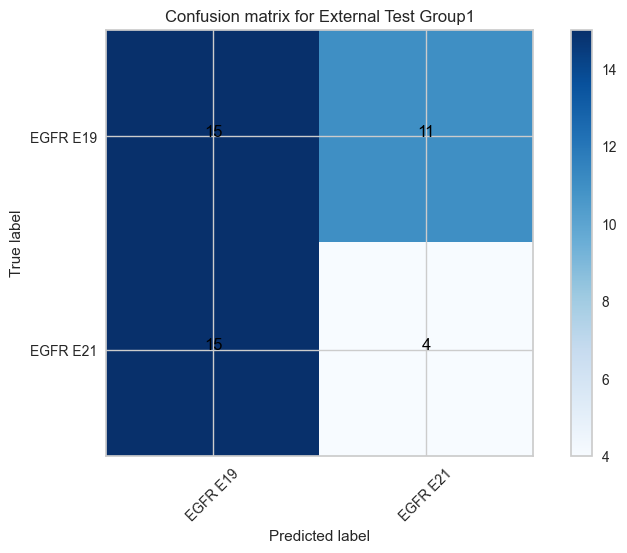

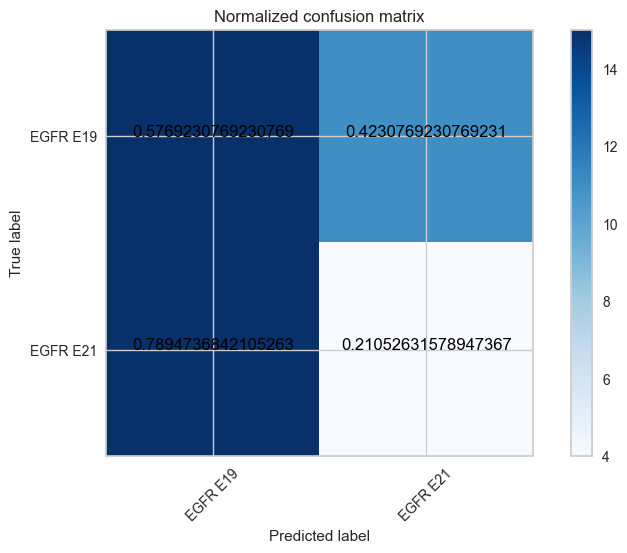

In [115]:
##lgb 测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()